# Fantasy Hockey Points Modeling

## Objective
Winning my fantasy hockey league using statistics to my advantage. Using the player stats data from hockey reference (https://www.hockey-reference.com/), I can use the data to model with linear regression on an expected performance for the following year.

# Setup

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import re
import os
import math
from bs4 import BeautifulSoup
import requests

## Getting Data

In [15]:
os.listdir()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'Fantasy Hockey Modeling.ipynb',
 'nhl-stats-2010-goalies.csv',
 'nhl-stats-2010-skaters.csv',
 'nhl-stats-2011-goalies.csv',
 'nhl-stats-2011-skaters.csv',
 'nhl-stats-2012-goalies.csv',
 'nhl-stats-2012-skaters.csv',
 'nhl-stats-2013-goalies.csv',
 'nhl-stats-2013-skaters.csv',
 'nhl-stats-2014-goalies.csv',
 'nhl-stats-2014-skaters.csv',
 'nhl-stats-2015-goalies.csv',
 'nhl-stats-2015-skaters.csv',
 'nhl-stats-2016-goalies.csv',
 'nhl-stats-2016-skaters.csv',
 'nhl-stats-2017-goalies.csv',
 'nhl-stats-2017-skaters.csv',
 'nhl-stats-2018-goalies.csv',
 'nhl-stats-2018-skaters.csv',
 'nhl-stats-2019-goalies.csv',
 'nhl-stats-2019-skaters.csv',
 'README.md']

In [16]:
skater_csvs = [x for x in os.listdir() if 'skaters' in x]
goalie_csvs = [x for x in os.listdir() if 'goalie' in x]

Consolidating the nhl stats files from over the years for both skaters and goalies. Since they have different stats, they need to be separated into independent dataset.

In [17]:
df = pd.read_csv(skater_csvs[0],header=1)
display(df)
df.info()

,Player Name,Team,Pos,Games,G,A,Pts,+/-,PIM,SOG,GWG,G.1,A.1,G.2,A.2,Hits,BS
0,Corey Perry,MON,RW,82,50,48,98,9,104,290,11,14,17,4,1,64,41
1,Steven Stamkos,TB,C,82,45,46,91,3,74,272,8,17,19,0,0,84,37
2,Jarome Iginla,FA,RW,82,43,43,86,0,40,289,6,14,16,0,0,103,28
3,Ryan Kesler,ANH,C,82,41,32,73,24,66,260,7,15,15,3,1,124,80
4,Daniel Sedin,FA,LW,82,41,63,104,30,32,266,10,18,24,0,0,13,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,Matt Walker,PHI,D,4,0,0,0,0,4,3,0,0,0,0,0,5,5
887,Kris Newbury,FA,C,11,0,1,1,-1,35,6,0,0,0,0,0,19,1
888,Nolan Yonkman,CGY,D,16,0,1,1,5,39,8,0,0,0,0,0,41,11
889,Dave Scatchard,FA,C,8,0,1,1,1,6,6,0,0,0,0,0,7,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Player Name  891 non-null    object
 1   Team         891 non-null    object
 2   Pos          891 non-null    object
 3   Games        891 non-null    int64 
 4   G            891 non-null    int64 
 5   A            891 non-null    int64 
 6   Pts          891 non-null    int64 
 7   +/-          891 non-null    int64 
 8   PIM          891 non-null    int64 
 9   SOG          891 non-null    int64 
 10  GWG          891 non-null    int64 
 11  G.1          891 non-null    int64 
 12  A.1          891 non-null    int64 
 13  G.2          891 non-null    int64 
 14  A.2          891 non-null    int64 
 15  Hits         891 non-null    int64 
 16  BS           891 non-null    int64 
dtypes: int64(14), object(3)
memory usage: 118.5+ KB


In [18]:
df_skaters = pd.DataFrame()
for csv in skater_csvs:
    df_temp = pd.read_csv(csv,header=1)
    df_temp['Year'] = csv.split('-')[2]
    df_skaters = pd.concat([df_skaters,df_temp])
df_skaters.rename(columns={'G.1':'PPG','A.1':'PPA','G.2':'SHG','A.2':'SHA'},inplace=True)
df_skaters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8858 entries, 0 to 882
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Player Name  8858 non-null   object
 1   Team         8858 non-null   object
 2   Pos          8858 non-null   object
 3   Games        8858 non-null   int64 
 4   G            8858 non-null   int64 
 5   A            8858 non-null   int64 
 6   Pts          8858 non-null   int64 
 7   +/-          8858 non-null   int64 
 8   PIM          8858 non-null   int64 
 9   SOG          8858 non-null   int64 
 10  GWG          8858 non-null   int64 
 11  PPG          8858 non-null   int64 
 12  PPA          8858 non-null   int64 
 13  SHG          8858 non-null   int64 
 14  SHA          8858 non-null   int64 
 15  Hits         8858 non-null   int64 
 16  BS           8858 non-null   int64 
 17  Year         8858 non-null   object
dtypes: int64(14), object(4)
memory usage: 1.3+ MB


In [19]:
df_goalies = pd.DataFrame()
for csv in goalie_csvs:
    df_temp = pd.read_csv(csv,header=1)
    df_temp['Year'] = csv.split('-')[2]
    df_goalies = pd.concat([df_goalies,df_temp])
df_goalies

,Player Name,Team,Games,W,L,OTL,GAA,GA,SA,SV,SV%,SO,MIN,Year
0,Roberto Luongo,FA,60,38,15,7,2.1,126,"1,753","1,627",0.928,4,"3,590",2010
1,Carey Price,MON,72,38,28,6,2.4,165,"2,147","1,982",0.923,8,"4,206",2010
2,Jimmy Howard,FA,63,37,17,5,2.8,168,"1,830","1,662",0.908,2,"3,615",2010
3,Miikka Kiprusoff,FA,71,37,24,6,2.6,182,"1,935","1,753",0.906,6,"4,156",2010
4,Cam Ward,FA,74,37,26,10,2.6,184,"2,375","2,191",0.923,4,"4,318",2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,Michael DiPietro,VAN,1,0,0,0,7.5,1,7,6,0.857,0,8,2019
82,Garret Sparks,CGY,1,0,0,0,4.4,2,14,12,0.857,0,27,2019
83,Anthony Stolarz,ANH,1,0,1,0,2.1,2,35,33,0.943,0,59,2019
84,Calvin Pickard,DET,3,0,2,0,5.5,15,74,59,0.797,0,165,2019


## Pre-processing Data
Reviewing the data acquired from the csvs, the data types are already in the appropriate types needed for additional manipulation. No further actions are required.

# Scoring Criteria

This is the where you can enter your fantasy league scoring rubric. Depending on the weight of the various statistics, will impact the overall weighting of the projected stats that we'll be forecasting.

The following are the scoring criteria in my Yahoo Fantasy Hockey league

In [20]:
skater_scoring_criteria = {
    'G': 30,
    'A': 25,
    '+/-': 5,
    'PIM': 1,
    'PPG': 5,
    'PPA': 5,
    'SHG': 10,
    'SHA': 10,
    'GWG': 5,
    'SOG': 1.5,
    'FW': 1,
    'FL': -1,
    'Hits': 1,
    'BS': 1
}
goalie_scoring_criteria = {
    'W': 35,
    'GA': -15,
    'SV': 2.5,
    'SO': 25
}

# Evaluating Players

In [21]:
forward_positions = {'RW','LW','C'}
def categorize_skater_position(x):
    """ Recategorizing the player positions from RW, LW, C into forwards (F) or defense (D)."""
    if x in forward_positions:
        return 'F'
    else:
        return 'D'

In [22]:
def calc_skater_fantasy_points(x):
    """Uses the scoring criteria outlined above to calculate fantasy points from the skaters' performance statistics."""
    fpts = 0
    for k,v in skater_scoring_criteria.items():
        try:
            fpts += x[k]*v
        except:
            pass
#             print(f'Could not find {k} in the data.')
    return fpts

def calc_skater_fantasy_points_per_game(x):
    """Uses the scoring criteria outlined above to calculate fantasy points per game from the skaters' performance statistics."""
    fpts = 0
    for k,v in skater_scoring_criteria.items():
        try:
            fpts += x[f"{k}/GP"]*v
        except:
            pass
#             print(f'Could not find {k} in the data.')
    return fpts

In [23]:
def calc_skater_projected_fantasy_points(x):
    """Uses the scoring criteria outlined above to calculate projected fantasy points from the skaters' performance statistics."""
    fpts = 0
    for k,v in skater_scoring_criteria.items():
        try:
            fpts += x[f"Projected {k}"]*v
        except:
            pass
#             print(f'Could not find {k} in the data.')
    return fpts
def calc_skater_projected_fantasy_points_per_game(x):
    """Uses the scoring criteria outlined above to calculate projected fantasy points per game from the skaters' performance statistics."""
    fpts = 0
    for k,v in skater_scoring_criteria.items():
        try:
            fpts += x[f"Projected {k}/GP"]*v
        except:
            pass
#             print(f'Could not find {k} in the data.')
    return fpts

In [24]:
def calc_goalie_fantasy_points(x):
    """Uses the scoring criteria outlined above to calculate fantasy points from the goalies' performance statistics."""
    fpts = 0
    for k,v in goalie_scoring_criteria.items():
        try:
            fpts += x[k]*v
        except:
            pass
#             print(f'Could not find {k} in the data.')
    return fpts
def calc_goalie_fantasy_points_per_game(x):
    """Uses the scoring criteria outlined above to calculate fantasy points per game from the goalies' performance statistics."""
    fpts = 0
    for k,v in goalie_scoring_criteria.items():
        try:
            fpts += x[f"{k}/GP"]*v
        except:
            pass
#             print(f'Could not find {k} in the data.')
    return fpts*x['Games']/70

In [25]:
def calc_goalie_projected_fantasy_points(x):
    """Uses the scoring criteria outlined above to calculate projected fantasy points from the goalies' performance statistics."""
    fpts = 0
    for k,v in goalie_scoring_criteria.items():
        try:
            fpts += x[f"Projected {k}"]*v
        except:
            pass
#             print(f'Could not find {k} in the data.')
    return fpts
def calc_goalie_projected_fantasy_points_per_game(x):
    """Uses the scoring criteria outlined above to calculate projected fantasy points per game from the goalies' performance statistics."""
    fpts = 0
    for k,v in goalie_scoring_criteria.items():
        try:
            fpts += x[f"Projected {k}/GP"]*v
        except:
            pass
#             print(f'Could not find {k} in the data.')
    return fpts*x['Games']/70

In [26]:
df_skaters['Fantasy Points'] = df_skaters.apply(calc_skater_fantasy_points,axis=1)
df_skaters

,Player Name,Team,Pos,Games,G,A,Pts,+/-,PIM,SOG,GWG,PPG,PPA,SHG,SHA,Hits,BS,Year,Fantasy Points
0,Corey Perry,MON,RW,82,50,48,98,9,104,290,11,14,17,4,1,64,41,2010,3649.0
1,Steven Stamkos,TB,C,82,45,46,91,3,74,272,8,17,19,0,0,84,37,2010,3338.0
2,Jarome Iginla,FA,RW,82,43,43,86,0,40,289,6,14,16,0,0,103,28,2010,3149.5
3,Ryan Kesler,ANH,C,82,41,32,73,24,66,260,7,15,15,3,1,124,80,2010,3035.0
4,Daniel Sedin,FA,LW,82,41,63,104,30,32,266,10,18,24,0,0,13,12,2010,3671.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,Ilya Lyubushkin,ARI,D,51,0,4,4,4,18,41,0,0,0,0,0,151,53,2019,403.5
879,Jean-Christophe Beaudin,OTT,C,22,0,1,1,-4,7,18,0,0,0,0,0,51,11,2019,101.0
880,Gabriel Carlsson,CLS,D,6,0,0,0,-1,2,3,0,0,0,0,0,5,0,2019,6.5
881,Anton Lindholm,CHI,D,4,0,1,1,1,0,1,0,0,0,0,0,5,5,2019,41.5


In [27]:
df_skaters[df_skaters['Player Name']=='Alex Killorn']

,Player Name,Team,Pos,Games,G,A,Pts,+/-,PIM,SOG,GWG,PPG,PPA,SHG,SHA,Hits,BS,Year,Fantasy Points
218,Alex Killorn,TB,C,38,7,12,19,-6,14,82,2,1,2,0,0,40,22,2012,704.0
130,Alex Killorn,TB,C,82,17,24,41,8,63,173,2,3,5,0,0,77,31,2013,1630.5
152,Alex Killorn,TB,C,71,15,23,38,8,36,130,5,1,2,1,0,60,21,2014,1427.0
169,Alex Killorn,TB,C,81,14,26,40,14,44,154,3,3,3,0,1,76,23,2015,1569.0
96,Alex Killorn,TB,C,81,19,17,36,-9,66,176,4,4,6,1,1,99,25,2016,1494.0
177,Alex Killorn,TB,C,82,15,32,47,22,45,156,1,2,7,0,0,82,25,2017,1796.0
134,Alex Killorn,TB,C,82,18,22,40,22,45,153,2,2,3,1,1,88,23,2018,1640.5
32,Alex Killorn,TB,C,68,26,23,49,19,20,130,7,8,5,0,0,59,15,2019,1839.0


In [28]:
df_skaters.groupby(['Player Name','Year']).sum()

Games   G   A  Pts  +/-  PIM  SOG  GWG  PPG  PPA  SHG  \
Player Name       Year                                                          
A.J. Greer        2016      5   0   1    1   -2    4    8    0    0    0    0   
                  2017     17   0   3    3    2   29   13    0    0    0    0   
                  2018     15   1   1    2   -2   14    9    0    0    0    0   
Aaron Ekblad      2014     81  12  27   39   12   32  170    4    6    7    0   
                  2015     78  15  21   36   18   41  182    4    3    6    0   
...                       ...  ..  ..  ...  ...  ...  ...  ...  ...  ...  ...   
Zemgus Girgensons 2019     69  12   7   19   -1   10   85    1    0    0    1   
Zenon Konopka     2010     82   2   7    9  -14  307   56    0    0    0    0   
                  2011     55   3   2    5   -4  193   34    1    1    0    0   
                  2012     37   0   0    0   -4  117   18    0    0    0    0   
                  2013     59   1   2    3   -9   88   21    0    0    0    0   

                        SHA  Hits  BS  Fantasy Points  
Player Name       Year                                 
A.J. Greer        2016    0     4   3            38.0  
                  2017    0    30   5           168.5  
                  2018    0    20   5            97.5  
Aaron Ekblad      2014    0   109  80          1656.0  
                  2015    0    87  59          1590.0  
...                     ...   ...  ..             ...  
Zemgus Girgensons 2019    0   110  20           812.5  
Zenon Konopka     2010    0   110  52           718.0  
                  2011    0    54  18           446.0  
                  2012    0    23   9           156.0  
                  2013    0    46  26           226.5  

[8857 rows x 15 columns]

In [29]:
df_goalies['SA'] = df_goalies['SA'].apply(lambda x: int(re.sub(',','',x)))
df_goalies['SV'] = df_goalies['SV'].apply(lambda x: int(re.sub(',','',x)))
df_goalies['MIN'] = df_goalies['MIN'].apply(lambda x: int(re.sub(',','',x)))
df_goalies['Year'] = df_goalies['Year'].apply(lambda x: int(re.sub(',','',x)))
df_goalies['Fantasy Points'] = df_goalies.apply(calc_goalie_fantasy_points,axis=1)
df_goalies

,Player Name,Team,Games,W,L,OTL,GAA,GA,SA,SV,SV%,SO,MIN,Year,Fantasy Points
0,Roberto Luongo,FA,60,38,15,7,2.1,126,1753,1627,0.928,4,3590,2010,3607.5
1,Carey Price,MON,72,38,28,6,2.4,165,2147,1982,0.923,8,4206,2010,4010.0
2,Jimmy Howard,FA,63,37,17,5,2.8,168,1830,1662,0.908,2,3615,2010,2980.0
3,Miikka Kiprusoff,FA,71,37,24,6,2.6,182,1935,1753,0.906,6,4156,2010,3097.5
4,Cam Ward,FA,74,37,26,10,2.6,184,2375,2191,0.923,4,4318,2010,4112.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,Michael DiPietro,VAN,1,0,0,0,7.5,1,7,6,0.857,0,8,2019,0.0
82,Garret Sparks,CGY,1,0,0,0,4.4,2,14,12,0.857,0,27,2019,0.0
83,Anthony Stolarz,ANH,1,0,1,0,2.1,2,35,33,0.943,0,59,2019,52.5
84,Calvin Pickard,DET,3,0,2,0,5.5,15,74,59,0.797,0,165,2019,-77.5


In [30]:
df_goalies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 907 entries, 0 to 85
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player Name     907 non-null    object 
 1   Team            907 non-null    object 
 2   Games           907 non-null    int64  
 3   W               907 non-null    int64  
 4   L               907 non-null    int64  
 5   OTL             907 non-null    int64  
 6   GAA             907 non-null    float64
 7   GA              907 non-null    int64  
 8   SA              907 non-null    int64  
 9   SV              907 non-null    int64  
 10  SV%             907 non-null    float64
 11  SO              907 non-null    int64  
 12  MIN             907 non-null    int64  
 13  Year            907 non-null    int64  
 14  Fantasy Points  907 non-null    float64
dtypes: float64(3), int64(10), object(2)
memory usage: 113.4+ KB


## Advanced Stats

In [17]:
df_advanced_stats = pd.read_csv('nhl-advanced-stats.csv')
df_advanced_stats['Player Name'] = df_advanced_stats['Player'].apply(lambda x: x.split('\\')[0])
df_advanced_stats['Player ID'] = df_advanced_stats['Player'].apply(lambda x: x.split('\\')[1])
df_advanced_stats

,Rk,Player,Age,Tm,Pos,GP,CF,CA,CF%,CF% rel,...,dZS%,TOI/60,TOI(EV),TK,GV,E+/-,SAtt.,Thru%,Player Name,Player ID
0,1,Justin Abdelkader\abdelju01,32,DET,LW,49,348,439,44.2,-1.9,...,56.7,11:32,9:48,10,18,-5.2,76,52.6,Justin Abdelkader,abdelju01
1,2,Pontus Aberg\abergpo01,26,TOR,LW,5,31,50,38.3,-18.2,...,40.0,8:42,8:42,1,2,-0.8,5,80.0,Pontus Aberg,abergpo01
2,3,Vitaly Abramov\abramvi01,21,OTT,RW,2,11,17,39.3,-14.7,...,66.7,5:47,5:47,0,1,-0.3,4,75.0,Vitaly Abramov,abramvi01
3,4,Noel Acciari\acciano01,28,FLA,C,66,790,894,46.9,-3.5,...,61.4,15:57,13:08,32,21,-6.3,189,57.1,Noel Acciari,acciano01
4,5,Andrew Agozzino\agozzan01,29,TOT,LW,22,127,104,55.0,8.0,...,46.6,7:21,6:49,5,4,-0.6,18,55.6,Andrew Agozzino,agozzan01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,879,Travis Zajac\zajactr01,34,NJD,C,69,833,978,46.0,0.2,...,54.8,17:06,13:26,36,17,-6.1,124,58.9,Travis Zajac,zajactr01
879,880,Mika Zibanejad\zibanmi01,26,NYR,C,57,853,843,50.3,4.5,...,50.2,21:38,15:17,42,43,-0.1,350,59.4,Mika Zibanejad,zibanmi01
880,881,Mats Zuccarello\zuccama01,32,MIN,LW,65,766,825,48.1,-2.2,...,45.4,15:56,13:16,33,17,2.0,164,58.5,Mats Zuccarello,zuccama01
881,882,Jason Zucker\zuckeja01,28,TOT,LW,60,775,776,50.0,0.3,...,45.9,16:19,13:45,31,25,2.6,173,64.2,Jason Zucker,zuckeja01


In [18]:
df_advanced_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rk           883 non-null    int64  
 1   Player       883 non-null    object 
 2   Age          883 non-null    int64  
 3   Tm           883 non-null    object 
 4   Pos          883 non-null    object 
 5   GP           883 non-null    int64  
 6   CF           883 non-null    int64  
 7   CA           883 non-null    int64  
 8   CF%          883 non-null    float64
 9   CF% rel      883 non-null    float64
 10  FF           883 non-null    int64  
 11  FA           883 non-null    int64  
 12  FF%          883 non-null    float64
 13  FF% rel      883 non-null    float64
 14  oiSH%        879 non-null    float64
 15  oiSV%        882 non-null    float64
 16  PDO          878 non-null    float64
 17  oZS%         882 non-null    float64
 18  dZS%         882 non-null    float64
 19  TOI/60  

## Linear Regression

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report, confusion_matrix
from sklearn.feature_selection import f_regression

In [32]:
factors = ['Games','G','A','+/-','PIM','SOG','GWG','PPG','PPA','SHG','SHA','Hits','BS']
pg_factors = ['G','A','+/-','PIM','SOG','GWG','PPG','PPA','SHG','SHA','Hits','BS']
advanced_factors = ['Age','CF','CA','CF%','CF% rel','FF','FA','FF%','FF% rel','oiSH%','oiSV%','PDO','oZS%','dZS%','TOI/60s','TOI(EV)s','TK','GV','E+/-','SAtt.','Thru%']
goalie_factors = ['Games','W','L','OTL','GAA','GA','SA','SV','SV%','SO','MIN']
goalie_pg_factors = ['W','L','OTL','GAA','GA','SA','SV','SV%','SO','MIN']

### Using Past Performance to Forecast

#### Skaters

In [21]:
df_2018 = pd.read_csv('nhl-stats-2018-skaters.csv',header=1)
df_2018.rename(columns={'G.1':'PPG','A.1':'PPA','G.2':'SHG','A.2':'SHA'},inplace=True)
df_2018['Fantasy Points'] = df_2018.apply(calc_skater_fantasy_points,axis=1)
df_2019 = pd.read_csv('nhl-stats-2019-skaters.csv',header=1)
df_2019.rename(columns={'G.1':'PPG','A.1':'PPA','G.2':'SHG','A.2':'SHA'},inplace=True)
df_2019['Fantasy Points'] = df_2019.apply(calc_skater_fantasy_points,axis=1)
df_skaters_merge = df_2018.merge(df_2019, on='Player Name', how='inner')

In [22]:
df_skaters_merge

,Player Name,Team_x,Pos_x,Games_x,G_x,A_x,Pts_x,+/-_x,PIM_x,SOG_x,...,PIM_y,SOG_y,GWG_y,PPG_y,PPA_y,SHG_y,SHA_y,Hits_y,BS_y,Fantasy Points_y
0,Alex Ovechkin,WAS,LW,81,51,38,89,7,40,338,...,30,311,3,13,5,0,0,184,30,2670.5
1,Leon Draisaitl,EDM,C,82,50,55,105,2,52,231,...,18,218,10,16,28,0,0,27,19,3591.0
2,John Tavares,TOR,C,82,47,41,88,19,34,286,...,24,197,4,7,14,0,0,32,31,2102.5
3,Steven Stamkos,TB,C,82,45,53,98,4,37,234,...,22,176,6,10,9,0,0,69,38,2383.0
4,Patrick Kane,CHI,RW,81,44,66,110,2,22,341,...,40,275,2,8,15,0,0,24,19,2925.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,Kole Sherwood,CLS,C,2,0,0,0,0,0,2,...,2,6,0,0,0,0,0,10,1,22.0
736,Dan Hamhuis,FA,D,57,0,5,5,-2,28,39,...,35,44,0,0,0,0,0,64,53,448.0
737,Karl Alzner,FA,D,9,0,1,1,1,2,8,...,0,4,0,0,0,0,0,1,4,6.0
738,Dylan McIlrath,DET,D,7,0,0,0,2,4,6,...,23,14,0,0,0,0,0,48,12,84.0


In [23]:
models = {}
for factor in factors:
    y = df_skaters_merge[f"{factor}_y"]
    X = df_skaters_merge[['Games_x','G_x','A_x','+/-_x','PIM_x','SOG_x','GWG_x','PPG_x','PPA_x','SHG_x','SHA_x','Hits_x','BS_x']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    lm = LinearRegression()
    lm.fit(X_train,y_train)
    models.setdefault(factor,lm)

In [24]:
df_yty = df_2019
for factor in factors:
    df_yty[f"Projected {factor}"] = models[factor].predict(df_yty[factors])
df_yty['Projected Fantasy Points'] = df_yty.apply(calc_skater_projected_fantasy_points,axis=1)
df_yty['Position'] = df_yty['Pos'].apply(lambda x: categorize_skater_position(x))
df_yty

,Player Name,Team,Pos,Games,G,A,Pts,+/-,PIM,SOG,...,Projected SOG,Projected GWG,Projected PPG,Projected PPA,Projected SHG,Projected SHA,Projected Hits,Projected BS,Projected Fantasy Points,Position
0,Alex Ovechkin,WAS,LW,68,48,19,67,-12,30,311,...,261.484702,5.537403,10.992536,6.135898,0.431250,-0.091870,152.772871,24.580799,2429.917524,F
1,David Pastrnak,BOS,RW,70,48,47,95,21,40,279,...,236.066938,5.320872,12.318890,14.264431,-0.443057,-0.030804,49.018449,24.223212,2657.624830,F
2,Auston Matthews,TOR,C,70,47,33,80,19,8,290,...,253.234852,5.247884,10.360360,11.707329,0.002404,0.012064,41.015734,48.229210,2539.802781,F
3,Leon Draisaitl,EDM,C,71,43,67,110,-7,18,218,...,181.009345,4.720437,10.334807,20.238487,-0.299624,0.011392,27.429421,13.662547,2610.476471,F
4,Mika Zibanejad,NYR,C,57,41,34,75,9,14,208,...,174.589783,4.473360,9.349582,9.492456,0.519959,0.870421,45.030382,40.519659,2016.141700,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,Ilya Lyubushkin,ARI,D,51,0,4,4,4,18,41,...,43.008661,0.275517,-0.356812,-0.210474,0.225722,0.322965,117.268201,46.462269,434.806775,D
879,Jean-Christophe Beaudin,OTT,C,22,0,1,1,-4,7,18,...,32.889748,0.330067,0.218754,0.377438,0.145942,0.107147,54.401655,19.229314,305.602691,F
880,Gabriel Carlsson,CLS,D,6,0,0,0,-1,2,3,...,27.673195,0.352717,0.515551,0.746831,0.049213,0.042297,26.294078,14.019256,261.852520,D
881,Anton Lindholm,CHI,D,4,0,1,1,1,0,1,...,27.069623,0.349845,0.554427,0.870244,0.023605,0.064005,26.400847,18.032087,274.307685,D


In [25]:
df_yty[['Player Name','Fantasy Points','Projected Fantasy Points']].sort_values(by=['Projected Fantasy Points'],ascending=False)

,Player Name,Fantasy Points,Projected Fantasy Points
8,Nathan MacKinnon,3311.0,2728.255653
1,David Pastrnak,3487.5,2657.624830
3,Leon Draisaitl,3591.0,2610.476471
9,Connor McDavid,3211.0,2558.678814
2,Auston Matthews,3023.0,2539.802781
...,...,...,...
799,Lawrence Pilut,22.0,252.951950
831,Timothy Liljegren,23.0,249.189620
721,Brian Gibbons,-1.5,246.945103
846,Tobias Bjornfot,-20.0,246.122756


C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


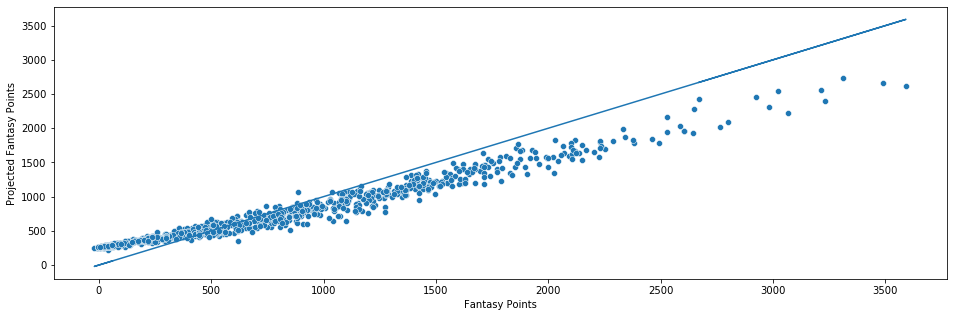

In [26]:
plt.figure(figsize=(16,5))
sns.scatterplot(df_yty['Fantasy Points'],df_yty['Projected Fantasy Points'])
plt.plot(df_yty['Fantasy Points'],df_yty['Fantasy Points'])

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


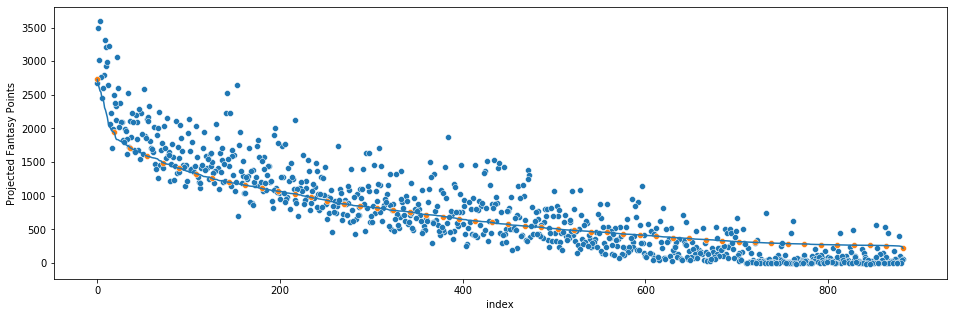

In [27]:
df_plot = df_yty.sort_values(by='Projected Fantasy Points',ascending=False).reset_index(drop=False)
plt.figure(figsize=(16,5))
sns.lineplot(df_plot.index.values, 'Projected Fantasy Points',data=df_plot)
sns.scatterplot(df_plot['index'],'Fantasy Points',data=df_plot)
sns.scatterplot(df_plot.loc[df_plot.index.values%18==0].index.values, df_plot['Projected Fantasy Points'].loc[df_plot.index.values%18==0])

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


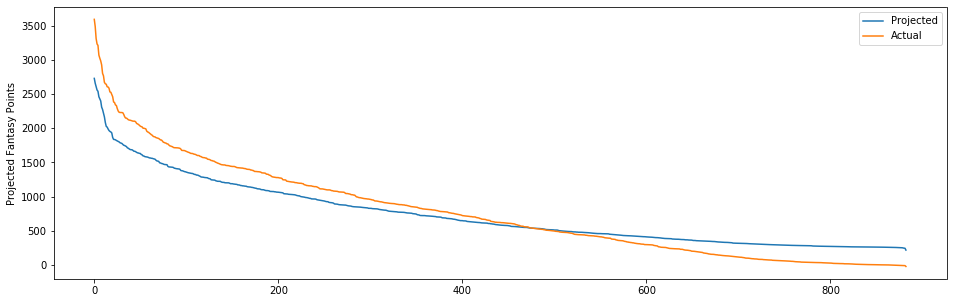

In [28]:
df_plot = df_yty.sort_values(by='Projected Fantasy Points',ascending=False).reset_index(drop=False)
df_plot2 = df_yty.sort_values(by='Fantasy Points',ascending=False).reset_index(drop=False)
plt.figure(figsize=(16,5))
sns.lineplot(df_plot.index.values, 'Projected Fantasy Points',data=df_plot,label='Projected')
sns.lineplot(df_plot2.index.values, 'Fantasy Points',data=df_plot2,label='Actual')

#### Goalies

In [29]:
df_2018 = pd.read_csv('nhl-stats-2018-goalies.csv',header=1)
df_2018['SA'] = df_2018['SA'].apply(lambda x: int(re.sub(',','',x)))
df_2018['SV'] = df_2018['SV'].apply(lambda x: int(re.sub(',','',x)))
df_2018['MIN'] = df_2018['MIN'].apply(lambda x: int(re.sub(',','',x)))
df_2018['Fantasy Points'] = df_2018.apply(calc_goalie_fantasy_points,axis=1)
df_2019 = pd.read_csv('nhl-stats-2019-goalies.csv',header=1)
df_2019['SA'] = df_2019['SA'].apply(lambda x: int(re.sub(',','',x)))
df_2019['SV'] = df_2019['SV'].apply(lambda x: int(re.sub(',','',x)))
df_2019['MIN'] = df_2019['MIN'].apply(lambda x: int(re.sub(',','',x)))
df_2019['Fantasy Points'] = df_2019.apply(calc_goalie_fantasy_points,axis=1)
df_goalie_merge = df_2018.merge(df_2019, on='Player Name', how='inner')

In [30]:
df_goalie_merge

,Player Name,Team_x,Games_x,W_x,L_x,OTL_x,GAA_x,GA_x,SA_x,SV_x,...,L_y,OTL_y,GAA_y,GA_y,SA_y,SV_y,SV%_y,SO_y,MIN_y,Fantasy Points_y
0,Andrei Vasilevskiy,TB,53,39,10,4,2.4,128,1713,1585,...,14,3,2.6,133,1605,1472,0.917,3,3122,2985.0
1,Sergei Bobrovsky,FLA,62,37,24,1,2.6,153,1756,1603,...,19,6,3.2,151,1505,1354,0.900,1,2806,1950.0
2,Martin Jones,SJ,62,36,19,5,3.0,176,1699,1523,...,21,2,3.0,118,1139,1021,0.896,2,2360,1427.5
3,Frederik Andersen,TOR,60,36,16,7,2.8,162,1958,1796,...,13,7,2.9,143,1577,1434,0.909,3,3007,2530.0
4,Marc-Andre Fleury,VGK,61,35,21,5,2.5,152,1745,1593,...,16,5,2.8,133,1399,1266,0.905,5,2880,2240.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Tristan Jarry,PIT,2,0,1,1,3.5,7,62,55,...,12,1,2.4,78,985,907,0.921,3,1926,1872.5
68,Eric Comrie,WPG,1,0,1,0,5.1,5,28,23,...,2,0,4.3,9,66,57,0.864,0,126,7.5
69,Pavel Francouz,COL,2,0,2,0,2.0,2,35,33,...,7,4,2.4,77,996,919,0.923,1,1914,1902.5
70,Michael DiPietro,VAN,1,0,1,0,7.0,7,24,17,...,0,0,7.5,1,7,6,0.857,0,8,0.0


In [31]:
models = {}
for factor in goalie_factors:
    y = df_goalie_merge[f"{factor}_y"]
    X = df_goalie_merge[[f"{f}_x" for f in goalie_factors]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    lm = LinearRegression()
    lm.fit(X_train,y_train)
    models.setdefault(factor,lm)

In [32]:
df_yty_goalie = df_2019
for factor in goalie_factors:
    df_yty_goalie[f"Projected {factor}"] = models[factor].predict(df_yty_goalie[goalie_factors])
df_yty_goalie['Projected Fantasy Points'] = df_yty_goalie.apply(calc_goalie_projected_fantasy_points,axis=1)
df_yty_goalie

,Player Name,Team,Games,W,L,OTL,GAA,GA,SA,SV,...,Projected L,Projected OTL,Projected GAA,Projected GA,Projected SA,Projected SV,Projected SV%,Projected SO,Projected MIN,Projected Fantasy Points
0,Andrei Vasilevskiy,TB,52,35,14,3,2.6,133,1605,1472,...,17.349464,4.747370,3.134284,143.672559,1479.596727,1335.924167,0.898418,2.379138,2955.067531,2220.982179
1,Connor Hellebuyck,WPG,58,31,21,5,2.6,140,1796,1656,...,12.651749,3.672111,2.945150,96.237064,1144.881520,1048.644456,0.906846,1.592369,2238.923025,1903.916898
2,Jordan Binnington,STL,50,30,13,7,2.6,126,1430,1304,...,15.674505,4.268295,2.642141,125.728296,1367.191648,1241.463352,0.908871,2.859861,2727.196026,2171.951699
3,Frederik Andersen,TOR,52,29,13,7,2.9,143,1577,1434,...,15.185264,4.234778,2.768434,122.472801,1329.398911,1206.926109,0.911147,1.960046,2564.748468,2042.953831
4,Marc-Andre Fleury,VGK,49,27,16,5,2.8,133,1399,1266,...,15.867659,4.217788,2.845823,119.487464,1274.093709,1154.606245,0.902154,2.823888,2558.788010,1944.996809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,Michael DiPietro,VAN,1,0,0,0,7.5,1,7,6,...,-1.848193,-5.027353,4.193500,-37.498249,-539.908025,-502.409776,0.846799,0.195645,-939.307860,-977.611817
82,Garret Sparks,CGY,1,0,0,0,4.4,2,14,12,...,2.837445,0.442531,4.080554,21.686051,235.122687,213.436635,0.883923,0.344545,459.198946,363.245310
83,Anthony Stolarz,ANH,1,0,1,0,2.1,2,35,33,...,6.038708,2.125651,2.198689,50.463426,598.194284,547.730857,0.915728,0.531285,1155.993332,998.146229
84,Calvin Pickard,DET,3,0,2,0,5.5,15,74,59,...,3.056111,0.149556,5.358662,17.074976,142.630677,125.555700,0.866745,0.282250,276.869943,119.593066


In [33]:
df_yty_goalie[['Player Name','Fantasy Points','Projected Fantasy Points']].sort_values(by=['Projected Fantasy Points'],ascending=False)

,Player Name,Fantasy Points,Projected Fantasy Points
6,Tuukka Rask,2520.0,2289.274515
0,Andrei Vasilevskiy,2985.0,2220.982179
2,Jordan Binnington,2495.0,2171.951699
3,Frederik Andersen,2530.0,2042.953831
4,Marc-Andre Fleury,2240.0,1944.996809
...,...,...,...
84,Calvin Pickard,-77.5,119.593066
68,Jimmy Howard,432.5,-127.416224
80,Oscar Dansk,-12.5,-246.903620
78,Kasimir Kaskisuo,-10.0,-262.505653


C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


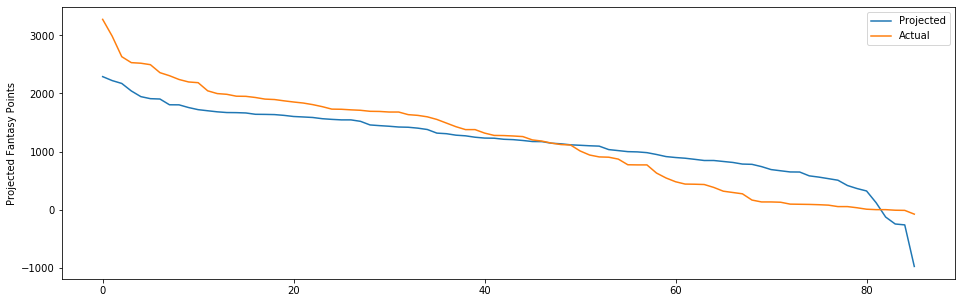

In [34]:
df_plot = df_yty_goalie.sort_values(by='Projected Fantasy Points',ascending=False).reset_index(drop=False)
df_plot2 = df_yty_goalie.sort_values(by='Fantasy Points',ascending=False).reset_index(drop=False)
plt.figure(figsize=(16,5))
sns.lineplot(df_plot.index.values, 'Projected Fantasy Points',data=df_plot,label='Projected')
sns.lineplot(df_plot2.index.values, 'Fantasy Points',data=df_plot2,label='Actual')

### Using Advanced Stats

In [35]:
df_2019 = pd.read_csv('nhl-stats-2019-skaters.csv',header=1)
df_2019_adv = df_2019.merge(df_advanced_stats, on='Player Name', how='inner')
df_2019_adv['Fantasy Points'] = df_2019_adv.apply(calc_skater_fantasy_points,axis=1)
df_2019_adv.rename(columns={'G.1':'PPG','A.1':'PPA','G.2':'SHG','A.2':'SHA'},inplace=True)
df_2019_adv['TOI/60s'] = df_2019_adv['TOI/60'].apply(lambda x: float(x.split(':')[1])+float(x.split(':')[0])*60)
df_2019_adv['TOI(EV)s'] = df_2019_adv['TOI(EV)'].apply(lambda x: float(x.split(':')[1])+float(x.split(':')[0])*60)
df_2019_adv.dropna(inplace=True)
df_2019_adv

,Player Name,Team,Pos_x,Games,G,A,Pts,+/-,PIM,SOG,...,TOI(EV),TK,GV,E+/-,SAtt.,Thru%,Player ID,Fantasy Points,TOI/60s,TOI(EV)s
0,Alex Ovechkin,WAS,LW,68,48,19,67,-12,30,311,...,15:39,28,48,2.1,561,55.4,ovechal01,2580.5,1239.0,939.0
1,David Pastrnak,BOS,RW,70,48,47,95,21,40,279,...,15:03,49,88,8.5,506,55.1,pastrda01,3297.5,1138.0,903.0
2,Auston Matthews,TOR,C,70,47,33,80,19,8,290,...,17:32,78,48,15.5,504,57.5,matthau01,2898.0,1258.0,1052.0
3,Leon Draisaitl,EDM,C,71,43,67,110,-7,18,218,...,17:37,60,91,-1.4,402,54.2,draisle01,3371.0,1357.0,1057.0
4,Mika Zibanejad,NYR,C,57,41,34,75,9,14,208,...,15:17,42,43,-0.1,350,59.4,zibanmi01,2581.0,1298.0,917.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,Kole Sherwood,CLS,C,3,0,0,0,0,2,6,...,6:38,2,0,0.3,6,100.0,sherwko01,22.0,398.0,398.0
852,Ilya Lyubushkin,ARI,D,51,0,4,4,4,18,41,...,13:52,13,20,6.7,90,45.6,lyubuil01,403.5,851.0,832.0
853,Gabriel Carlsson,CLS,D,6,0,0,0,-1,2,3,...,10:16,0,3,0.3,7,42.9,carlsga01,6.5,653.0,616.0
854,Anton Lindholm,CHI,D,4,0,1,1,1,0,1,...,11:24,0,0,0.7,4,25.0,lindhan01,41.5,707.0,684.0


In [36]:
advanced_models = {}
all_factors = factors+advanced_factors
for factor in factors+advanced_factors:
    y = df_2019_adv[f"{factor}"]
    X = df_2019_adv[[x for x in all_factors if x != factor]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    lm = LinearRegression()
    lm.fit(X_train,y_train)
    advanced_models.setdefault(factor,lm)

In [37]:
for factor in all_factors:
    df_2019_adv[f"Projected {factor}"] = advanced_models[factor].predict(df_2019_adv[[x for x in all_factors if x != factor]])
df_2019_adv['Projected Fantasy Points'] = df_2019_adv.apply(calc_skater_projected_fantasy_points,axis=1)
df_2019_adv['Variance'] = df_2019_adv['Projected Fantasy Points'] - df_2019_adv['Fantasy Points']
df_2019_adv['Position'] = df_2019_adv['Pos_x'].apply(lambda x: categorize_skater_position(x))
df_2019_adv

,Player Name,Team,Pos_x,Games,G,A,Pts,+/-,PIM,SOG,...,Projected TOI/60s,Projected TOI(EV)s,Projected TK,Projected GV,Projected E+/-,Projected SAtt.,Projected Thru%,Projected Fantasy Points,Variance,Position
0,Alex Ovechkin,WAS,LW,68,48,19,67,-12,30,311,...,1222.496117,955.692189,31.044668,47.371972,4.018376,532.600580,52.905683,2471.966887,-108.533113,F
1,David Pastrnak,BOS,RW,70,48,47,95,21,40,279,...,1212.090514,841.575766,48.198649,57.573452,9.429981,486.515851,50.148022,3497.200563,199.700563,F
2,Auston Matthews,TOR,C,70,47,33,80,19,8,290,...,1375.472984,972.349671,40.724468,57.836339,12.255498,505.905181,60.523090,3001.031380,103.031380,F
3,Leon Draisaitl,EDM,C,71,43,67,110,-7,18,218,...,1420.802266,1009.643701,53.801488,76.818134,-4.047284,389.846669,48.670411,3455.586475,84.586475,F
4,Mika Zibanejad,NYR,C,57,41,34,75,9,14,208,...,1313.525513,900.869235,45.053209,41.773719,2.117853,352.323374,59.723354,2629.375639,48.375639,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,Kole Sherwood,CLS,C,3,0,0,0,0,2,6,...,406.189347,435.049876,1.193503,-1.596544,0.938287,-7.364083,68.080701,-27.027414,-49.027414,F
852,Ilya Lyubushkin,ARI,D,51,0,4,4,4,18,41,...,906.196053,792.539930,10.502276,27.415256,0.593205,93.050135,51.019734,390.284153,-13.215847,D
853,Gabriel Carlsson,CLS,D,6,0,0,0,-1,2,3,...,639.898161,627.739368,1.106568,2.245079,-0.018334,11.879446,59.597824,-27.147935,-33.647935,D
854,Anton Lindholm,CHI,D,4,0,1,1,1,0,1,...,739.982228,663.312013,0.033337,1.575358,-0.205810,17.033373,51.347465,35.261475,-6.238525,D


In [38]:
df_2019_adv[['Player Name','Fantasy Points','Projected Fantasy Points','Variance']].sort_values(by=['Projected Fantasy Points'],ascending=False)

,Player Name,Fantasy Points,Projected Fantasy Points,Variance
1,David Pastrnak,3297.5,3497.200563,199.700563
3,Leon Draisaitl,3371.0,3455.586475,84.586475
8,Nathan MacKinnon,3156.0,3179.921643,23.921643
9,Connor McDavid,2996.0,3134.689840,138.689840
2,Auston Matthews,2898.0,3001.031380,103.031380
...,...,...,...,...
758,Chase De Leo,2.5,-78.057413,-80.557413
761,Justin Bailey,5.5,-80.050987,-85.550987
824,Calvin Thurkauf,6.5,-91.932559,-98.432559
831,Jean-Sebastien Dea,3.0,-107.421677,-110.421677


C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


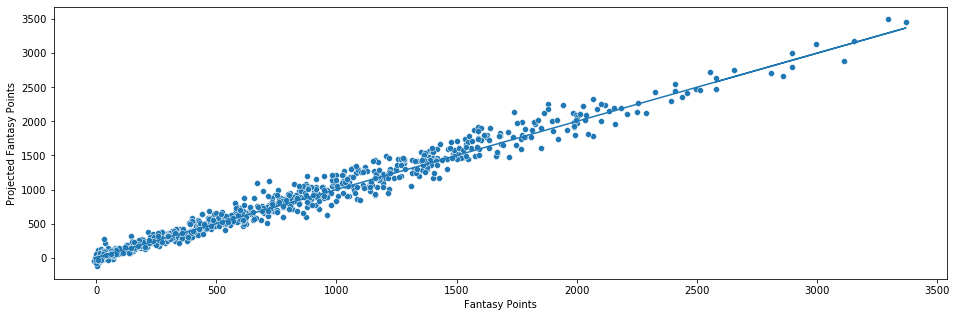

In [39]:
plt.figure(figsize=(16,5))
sns.scatterplot(df_2019_adv['Fantasy Points'],df_2019_adv['Projected Fantasy Points'])
plt.plot(df_2019_adv['Fantasy Points'],df_2019_adv['Fantasy Points'])

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


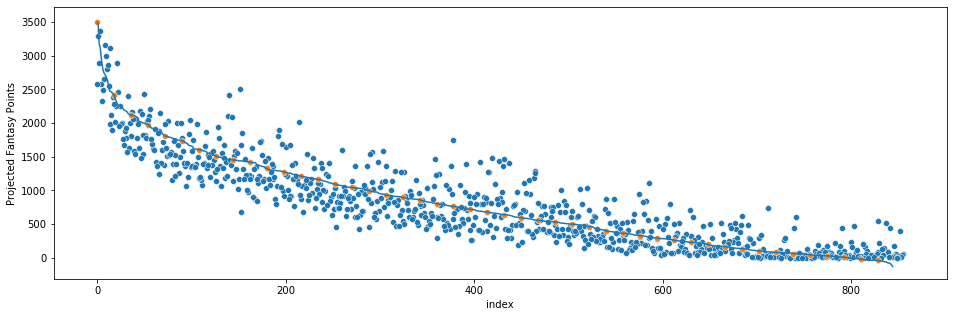

In [40]:
df_plot = df_2019_adv.sort_values(by='Projected Fantasy Points',ascending=False).reset_index(drop=False)
plt.figure(figsize=(16,5))
sns.lineplot(df_plot.index.values, 'Projected Fantasy Points',data=df_plot)
sns.scatterplot(df_plot['index'],'Fantasy Points',data=df_plot)
sns.scatterplot(df_plot.loc[df_plot.index.values%18==0].index.values, df_plot['Projected Fantasy Points'].loc[df_plot.index.values%18==0])

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


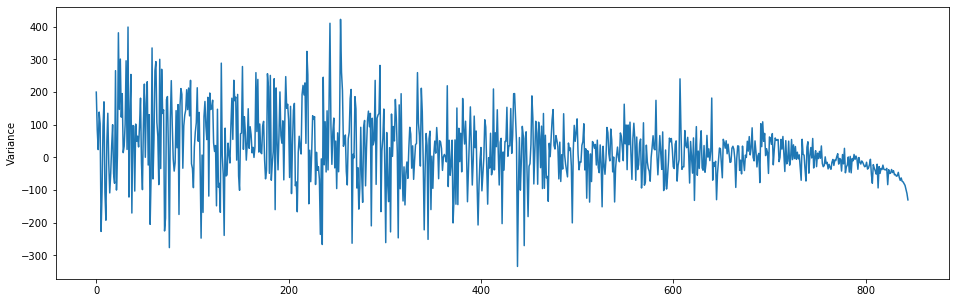

In [41]:
df_plot = df_2019_adv.sort_values(by='Projected Fantasy Points',ascending=False).reset_index(drop=False)
plt.figure(figsize=(16,5))
sns.lineplot(df_plot.index.values, 'Variance',data=df_plot)
# sns.scatterplot(df_plot['index'],'Fantasy Points',data=df_plot)

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


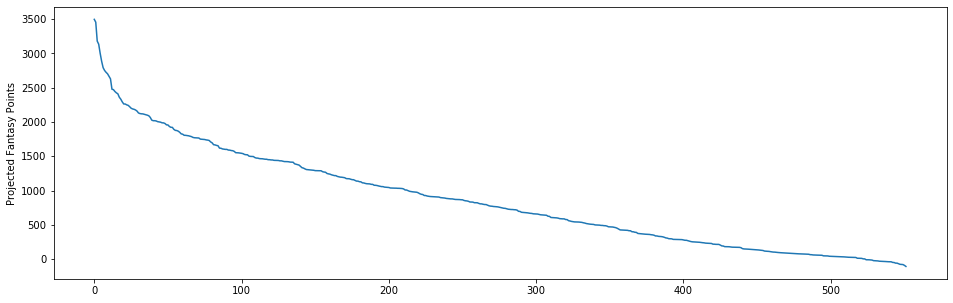

In [42]:
df_plot = df_2019_adv[df_2019_adv['Position']=='F'].sort_values(by='Projected Fantasy Points',ascending=False).reset_index(drop=True)
plt.figure(figsize=(16,5))
sns.lineplot(df_plot.index.values, 'Projected Fantasy Points',data=df_plot)

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


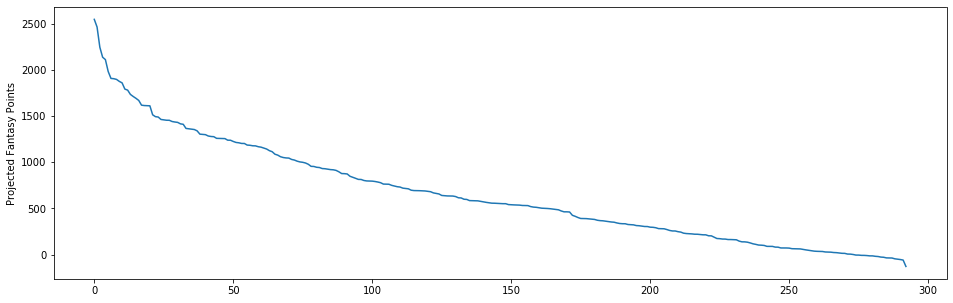

In [43]:
df_plot = df_2019_adv[df_2019_adv['Position']=='D'].sort_values(by='Projected Fantasy Points',ascending=False).reset_index(drop=True)
plt.figure(figsize=(16,5))
sns.lineplot(df_plot.index.values, 'Projected Fantasy Points',data=df_plot)

In [44]:
df_plot

,Player Name,Team,Pos_x,Games,G,A,Pts,+/-,PIM,SOG,...,Projected TOI/60s,Projected TOI(EV)s,Projected TK,Projected GV,Projected E+/-,Projected SAtt.,Projected Thru%,Projected Fantasy Points,Variance,Position
0,Roman Josi,NSH,D,69,16,49,65,22,41,260,...,1555.548132,1220.200711,41.932342,71.022511,12.867534,490.551397,55.959246,2546.040874,135.040874,D
1,John Carlson,WAS,D,69,15,60,75,12,26,189,...,1489.869278,1138.442987,49.335145,75.205638,5.952644,370.778128,49.334841,2463.046027,-49.453973,D
2,Alex Pietrangelo,VGK,D,70,16,36,52,11,20,225,...,1483.783378,1104.688561,34.265277,59.541234,6.374945,411.461326,51.580727,2244.332747,300.832747,D
3,Shea Theodore,VGK,D,71,13,33,46,12,25,219,...,1393.882948,1090.933414,42.543436,68.559774,17.617433,406.732876,41.732571,2136.303319,398.803319,D
4,Victor Hedman,TB,D,66,11,44,55,27,31,155,...,1395.206768,1130.167978,34.115957,59.801198,7.270785,299.146598,48.461084,2110.347010,95.847010,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,Trevor Carrick,SJ,D,3,0,0,0,0,5,1,...,295.166817,372.957054,1.073585,0.616182,0.160915,16.207288,58.401034,-45.736926,-53.236926,D
289,Kevin Connauton,FLA,D,4,0,0,0,-2,0,4,...,940.683944,815.173213,0.324961,1.646202,-1.074770,17.164901,47.552396,-49.401247,-57.401247,D
290,Gustav Olofsson,MON,D,3,0,0,0,-4,2,2,...,513.385098,467.685716,0.802345,1.222248,-1.117339,18.158310,58.199933,-53.700186,-45.700186,D
291,John Gilmour,FA,D,4,0,0,0,-2,0,5,...,1037.556789,879.563633,0.091372,5.328029,-1.159609,8.958826,49.041667,-59.266853,-62.766853,D


### Using Stats Per Game to Forecast

#### Skaters

In [45]:
df = pd.read_csv('nhl-stats-2018-skaters.csv',header=1)
df.rename(columns={'G.1':'PPG','A.1':'PPA','G.2':'SHG','A.2':'SHA'},inplace=True)
for col in factors:
    df[f"{col}/GP"] = df[col]/df['Games']
df['Fantasy PPG'] = df.apply(calc_skater_fantasy_points_per_game,axis=1)

In [46]:
df_2018 = pd.read_csv('nhl-stats-2018-skaters.csv',header=1)
df_2018.rename(columns={'G.1':'PPG','A.1':'PPA','G.2':'SHG','A.2':'SHA'},inplace=True)
df_2018['Fantasy Points'] = df_2018.apply(calc_skater_fantasy_points,axis=1)
for col in factors:
    df_2018[f"{col}/GP"] = df_2018[col]/df_2018['Games']
df_2018['Fantasy PPG'] = df_2018.apply(calc_skater_fantasy_points_per_game,axis=1)
df_2019 = pd.read_csv('nhl-stats-2019-skaters.csv',header=1)
df_2019.rename(columns={'G.1':'PPG','A.1':'PPA','G.2':'SHG','A.2':'SHA'},inplace=True)
df_2019['Fantasy Points'] = df_2019.apply(calc_skater_fantasy_points,axis=1)
for col in factors:
    df_2019[f"{col}/GP"] = df_2019[col]/df_2019['Games']
df_2019['Fantasy PPG'] = df_2019.apply(calc_skater_fantasy_points_per_game,axis=1)
df_merge = df_2018.merge(df_2019, on='Player Name', how='inner')
df_merge

,Player Name,Team_x,Pos_x,Games_x,G_x,A_x,Pts_x,+/-_x,PIM_x,SOG_x,...,PIM/GP_y,SOG/GP_y,GWG/GP_y,PPG/GP_y,PPA/GP_y,SHG/GP_y,SHA/GP_y,Hits/GP_y,BS/GP_y,Fantasy PPG_y
0,Alex Ovechkin,WAS,LW,81,51,38,89,7,40,338,...,0.441176,4.573529,0.044118,0.191176,0.073529,0.0,0.000000,2.705882,0.441176,39.272059
1,Leon Draisaitl,EDM,C,82,50,55,105,2,52,231,...,0.253521,3.070423,0.140845,0.225352,0.394366,0.0,0.000000,0.380282,0.267606,50.577465
2,John Tavares,TOR,C,82,47,41,88,19,34,286,...,0.380952,3.126984,0.063492,0.111111,0.222222,0.0,0.000000,0.507937,0.492063,33.373016
3,Steven Stamkos,TB,C,82,45,53,98,4,37,234,...,0.385965,3.087719,0.105263,0.175439,0.157895,0.0,0.000000,1.210526,0.666667,41.807018
4,Patrick Kane,CHI,RW,81,44,66,110,2,22,341,...,0.571429,3.928571,0.028571,0.114286,0.214286,0.0,0.000000,0.342857,0.271429,41.792857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,Kole Sherwood,CLS,C,2,0,0,0,0,0,2,...,0.666667,2.000000,0.000000,0.000000,0.000000,0.0,0.000000,3.333333,0.333333,7.333333
736,Dan Hamhuis,FA,D,57,0,5,5,-2,28,39,...,0.583333,0.733333,0.000000,0.000000,0.000000,0.0,0.000000,1.066667,0.883333,7.466667
737,Karl Alzner,FA,D,9,0,1,1,1,2,8,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.250000,1.000000,1.500000
738,Dylan McIlrath,DET,D,7,0,0,0,2,4,6,...,1.437500,0.875000,0.000000,0.000000,0.000000,0.0,0.000000,3.000000,0.750000,5.250000


In [47]:
models = {}
for factor in pg_factors:
    y = df_merge[f"{factor}/GP_y"]
#     X = df_merge[['Games_x','G_x','A_x','+/-_x','PIM_x','SOG_x','GWG_x','PPG_x','PPA_x','SHG_x','SHA_x','Hits_x','BS_x']]
    X = df_merge[[f"{f}/GP_x" for f in pg_factors]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    lm = LinearRegression()
    lm.fit(X_train,y_train)
    models.setdefault(factor,lm)

In [48]:
df_yty_pg_skaters = df_2019
for factor in pg_factors:
    df_yty_pg_skaters[f"Projected {factor}/GP"] = models[factor].predict(df_yty_pg_skaters[[f"{f}/GP" for f in pg_factors]])
# df_yty_pg_skaters['Projected Fantasy Points'] = df_yty_pg.apply(calc_skater_projected_fantasy_points,axis=1)
df_yty_pg_skaters['Projected Fantasy PPG'] = df_yty_pg_skaters.apply(calc_skater_projected_fantasy_points_per_game,axis=1)
df_yty_pg_skaters['Position'] = df_yty['Pos'].apply(lambda x: categorize_skater_position(x))
df_yty_pg_skaters

,Player Name,Team,Pos,Games,G,A,Pts,+/-,PIM,SOG,...,Projected SOG/GP,Projected GWG/GP,Projected PPG/GP,Projected PPA/GP,Projected SHG/GP,Projected SHA/GP,Projected Hits/GP,Projected BS/GP,Projected Fantasy PPG,Position
0,Alex Ovechkin,WAS,LW,68,48,19,67,-12,30,311,...,3.839110,0.076705,0.150560,0.094721,0.005418,-0.001084,2.370608,0.366146,34.360429,F
1,David Pastrnak,BOS,RW,70,48,47,95,21,40,279,...,3.889416,0.089757,0.201529,0.258748,-0.005272,-0.001468,0.653770,0.282481,44.418786,F
2,Auston Matthews,TOR,C,70,47,33,80,19,8,290,...,3.521754,0.065521,0.136640,0.180924,-0.000901,0.000018,0.621560,0.742656,34.302062,F
3,Leon Draisaitl,EDM,C,71,43,67,110,-7,18,218,...,3.438425,0.078169,0.173044,0.348932,-0.003709,-0.000680,0.359484,0.174546,44.074706,F
4,Mika Zibanejad,NYR,C,57,41,34,75,9,14,208,...,3.474467,0.087331,0.173572,0.208636,0.010955,0.016464,0.773373,0.638537,39.645158,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,Ilya Lyubushkin,ARI,D,51,0,4,4,4,18,41,...,0.965313,0.005204,-0.006221,-0.004206,0.003534,0.004952,2.429596,1.139390,8.945955,D
879,Jean-Christophe Beaudin,OTT,C,22,0,1,1,-4,7,18,...,0.995418,0.009294,-0.000137,-0.002805,0.004629,0.002826,2.044883,0.621635,8.787729,F
880,Gabriel Carlsson,CLS,D,6,0,0,0,-1,2,3,...,0.740691,0.008856,0.000226,0.001688,0.002575,0.000811,1.023102,0.169750,6.875401,D
881,Anton Lindholm,CHI,D,4,0,1,1,1,0,1,...,0.632513,0.002924,-0.009880,0.019472,0.000488,0.007114,1.100317,1.242347,8.157620,D


In [49]:
df_yty_pg_skaters[['Player Name','Fantasy PPG','Projected Fantasy PPG']].sort_values(by='Projected Fantasy PPG',ascending=False)
# df_yty_pg_skaters[['Player Name','Fantasy PPG','Projected Fantasy PPG']].sort_values(by='Fantasy PPG',ascending=False)

,Player Name,Fantasy PPG,Projected Fantasy PPG
1,David Pastrnak,49.821429,44.418786
9,Connor McDavid,50.171875,44.085641
3,Leon Draisaitl,50.577465,44.074706
8,Nathan MacKinnon,47.985507,43.243588
4,Mika Zibanejad,48.526316,39.645158
...,...,...,...
710,Nikolai Knyzhov,1.666667,4.218412
764,Austin Poganski,0.000000,4.189105
711,German Rubtsov,1.125000,4.188493
843,Paul Carey,-4.000000,2.847017


C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


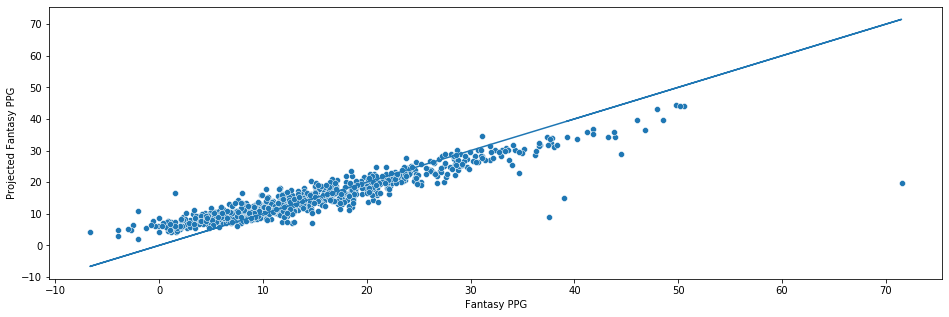

In [50]:
plt.figure(figsize=(16,5))
sns.scatterplot(df_yty_pg_skaters['Fantasy PPG'],df_yty_pg_skaters['Projected Fantasy PPG'],data=df_yty_pg_skaters)
plt.plot(df_yty_pg_skaters['Fantasy PPG'],df_yty_pg_skaters['Fantasy PPG'])

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


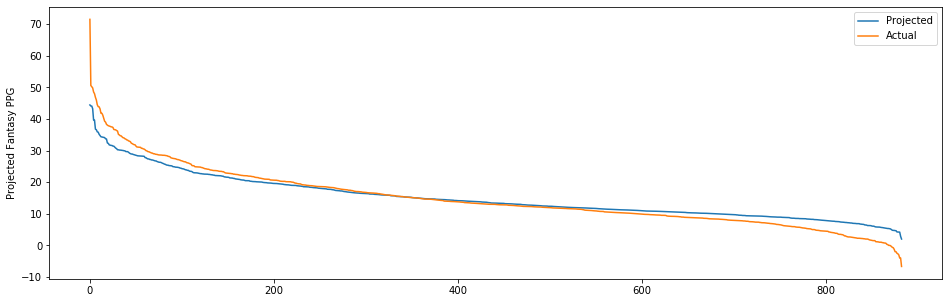

In [51]:
df_plot = df_yty_pg_skaters.sort_values(by='Projected Fantasy PPG',ascending=False).reset_index(drop=False)
df_plot2 = df_yty_pg_skaters.sort_values(by='Fantasy PPG',ascending=False).reset_index(drop=False)
plt.figure(figsize=(16,5))
sns.lineplot(df_plot.index.values, 'Projected Fantasy PPG',data=df_plot,label='Projected')
sns.lineplot(df_plot2.index.values, 'Fantasy PPG',data=df_plot2,label='Actual')
plt.legend()

#### Goalies

In [52]:
df_2018 = pd.read_csv('nhl-stats-2018-goalies.csv',header=1)
df_2018['Fantasy Points'] = df_2018.apply(calc_skater_fantasy_points,axis=1)
df_2018['SA'] = df_2018['SA'].apply(lambda x: int(re.sub(',','',x)))
df_2018['SV'] = df_2018['SV'].apply(lambda x: int(re.sub(',','',x)))
df_2018['MIN'] = df_2018['MIN'].apply(lambda x: int(re.sub(',','',x)))
for col in goalie_pg_factors:
    df_2018[f"{col}/GP"] = df_2018[col]/df_2018['Games']
df_2018['Fantasy PPG'] = df_2018.apply(calc_goalie_fantasy_points_per_game,axis=1)
df_2019 = pd.read_csv('nhl-stats-2019-goalies.csv',header=1)
df_2019['SA'] = df_2019['SA'].apply(lambda x: int(re.sub(',','',x)))
df_2019['SV'] = df_2019['SV'].apply(lambda x: int(re.sub(',','',x)))
df_2019['MIN'] = df_2019['MIN'].apply(lambda x: int(re.sub(',','',x)))
df_2019['Fantasy Points'] = df_2019.apply(calc_goalie_fantasy_points,axis=1)
for col in goalie_pg_factors:
    df_2019[f"{col}/GP"] = df_2019[col]/df_2019['Games']
df_2019['Fantasy PPG'] = df_2019.apply(calc_goalie_fantasy_points_per_game,axis=1)
df_merge = df_2018.merge(df_2019, on='Player Name', how='inner')
df_merge

,Player Name,Team_x,Games_x,W_x,L_x,OTL_x,GAA_x,GA_x,SA_x,SV_x,...,L/GP_y,OTL/GP_y,GAA/GP_y,GA/GP_y,SA/GP_y,SV/GP_y,SV%/GP_y,SO/GP_y,MIN/GP_y,Fantasy PPG_y
0,Andrei Vasilevskiy,TB,53,39,10,4,2.4,128,1713,1585,...,0.269231,0.057692,0.050000,2.557692,30.865385,28.307692,0.017635,0.057692,60.038462,42.642857
1,Sergei Bobrovsky,FLA,62,37,24,1,2.6,153,1756,1603,...,0.380000,0.120000,0.064000,3.020000,30.100000,27.080000,0.018000,0.020000,56.120000,27.857143
2,Martin Jones,SJ,62,36,19,5,3.0,176,1699,1523,...,0.512195,0.048780,0.073171,2.878049,27.780488,24.902439,0.021854,0.048780,57.560976,20.392857
3,Frederik Andersen,TOR,60,36,16,7,2.8,162,1958,1796,...,0.250000,0.134615,0.055769,2.750000,30.326923,27.576923,0.017481,0.057692,57.826923,36.142857
4,Marc-Andre Fleury,VGK,61,35,21,5,2.5,152,1745,1593,...,0.326531,0.102041,0.057143,2.714286,28.551020,25.836735,0.018469,0.102041,58.775510,32.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Tristan Jarry,PIT,2,0,1,1,3.5,7,62,55,...,0.363636,0.030303,0.072727,2.363636,29.848485,27.484848,0.027909,0.090909,58.363636,26.750000
68,Eric Comrie,WPG,1,0,1,0,5.1,5,28,23,...,0.666667,0.000000,1.433333,3.000000,22.000000,19.000000,0.288000,0.000000,42.000000,0.107143
69,Pavel Francouz,COL,2,0,2,0,2.0,2,35,33,...,0.205882,0.117647,0.070588,2.264706,29.294118,27.029412,0.027147,0.029412,56.294118,27.178571
70,Michael DiPietro,VAN,1,0,1,0,7.0,7,24,17,...,0.000000,0.000000,7.500000,1.000000,7.000000,6.000000,0.857000,0.000000,8.000000,0.000000


In [53]:
models = {}
for factor in goalie_pg_factors:
    y = df_merge[f"{factor}/GP_y"]
#     X = df_merge[['Games_x','G_x','A_x','+/-_x','PIM_x','SOG_x','GWG_x','PPG_x','PPA_x','SHG_x','SHA_x','Hits_x','BS_x']]
    X = df_merge[[f"{f}/GP_x" for f in goalie_pg_factors]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    lm = LinearRegression()
    lm.fit(X_train,y_train)
    models.setdefault(factor,lm)

In [54]:
df_yty_pg_goalie = df_2019
for factor in goalie_pg_factors:
    df_yty_pg_goalie[f"Projected {factor}/GP"] = models[factor].predict(df_yty_pg_goalie[[f"{f}/GP" for f in goalie_pg_factors]])
df_yty_pg_goalie['Projected Fantasy PPG'] = df_yty_pg_goalie.apply(calc_goalie_projected_fantasy_points_per_game,axis=1)
df_yty_pg_goalie['Pos'] = 'G'
df_yty_pg_goalie

,Player Name,Team,Games,W,L,OTL,GAA,GA,SA,SV,...,Projected OTL/GP,Projected GAA/GP,Projected GA/GP,Projected SA/GP,Projected SV/GP,Projected SV%/GP,Projected SO/GP,Projected MIN/GP,Projected Fantasy PPG,Pos
0,Andrei Vasilevskiy,TB,52,35,14,3,2.6,133,1605,1472,...,0.121736,-0.010394,2.614686,28.020616,25.405930,-0.044667,0.043858,55.397786,32.381113,G
1,Connor Hellebuyck,WPG,58,31,21,5,2.6,140,1796,1656,...,0.084182,-0.036536,2.672901,30.450626,27.777725,0.012533,0.043986,58.320813,40.206387,G
2,Jordan Binnington,STL,50,30,13,7,2.6,126,1430,1304,...,0.118653,0.018456,2.513022,27.847813,25.334790,-0.058866,0.060802,55.452690,33.392287,G
3,Frederik Andersen,TOR,52,29,13,7,2.9,143,1577,1434,...,0.092788,0.196007,2.736851,28.761957,26.025106,0.036798,0.046773,56.366790,30.659277,G
4,Marc-Andre Fleury,VGK,49,27,16,5,2.8,133,1399,1266,...,0.103157,0.413277,2.719027,27.666751,24.947724,0.066140,0.046787,54.384222,26.018554,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,Michael DiPietro,VAN,1,0,0,0,7.5,1,7,6,...,-0.002707,5.067311,0.038782,28.578594,28.539812,0.831410,0.043696,45.832121,1.465723,G
82,Garret Sparks,CGY,1,0,0,0,4.4,2,14,12,...,0.055997,3.840658,2.473484,30.073890,27.600405,1.110671,-0.041052,53.010263,0.410235,G
83,Anthony Stolarz,ANH,1,0,1,0,2.1,2,35,33,...,0.124279,-1.692368,3.181552,37.105124,33.923572,0.111635,-0.039211,67.880687,0.663223,G
84,Calvin Pickard,DET,3,0,2,0,5.5,15,74,59,...,0.046590,3.600584,3.433899,19.463325,16.029426,0.784325,-0.037040,36.270303,-1.196616,G


In [55]:
df_yty_pg_goalie[['Player Name','Team','Games','Fantasy PPG','Projected Fantasy PPG']].sort_values(by='Projected Fantasy PPG',ascending=False)[:30]
# df_yty_pg_goalie[['Player Name','Fantasy PPG','Projected Fantasy PPG']].sort_values(by='Fantasy PPG',ascending=False)[:30]

,Player Name,Team,Games,Fantasy PPG,Projected Fantasy PPG
1,Connor Hellebuyck,WPG,58,46.785714,40.206387
6,Tuukka Rask,BOS,41,36.000000,34.311832
5,Carey Price,MON,58,37.607143,34.146191
2,Jordan Binnington,STL,50,35.642857,33.392287
12,MacKenzie Blackwood,NJ,47,32.928571,32.469880
0,Andrei Vasilevskiy,TB,52,42.642857,32.381113
15,Ben Bishop,DAL,44,31.392857,30.662270
3,Frederik Andersen,TOR,52,36.142857,30.659277
20,Semyon Varlamov,NYI,45,28.357143,29.731653
11,Jacob Markstrom,CGY,43,33.678571,28.388046


C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


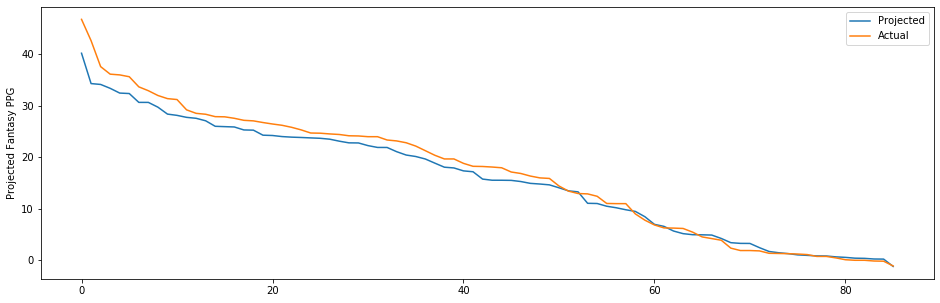

In [56]:
df_plot = df_yty_pg_goalie.sort_values(by='Projected Fantasy PPG',ascending=False).reset_index(drop=False)
df_plot2 = df_yty_pg_goalie.sort_values(by='Fantasy PPG',ascending=False).reset_index(drop=False)
plt.figure(figsize=(16,5))
sns.lineplot(df_plot.index.values, 'Projected Fantasy PPG',data=df_plot,label='Projected')
sns.lineplot(df_plot2.index.values, 'Fantasy PPG',data=df_plot2,label='Actual')
plt.legend()

#### Combined

In [57]:
df_yty_pg = pd.concat([df_yty_pg_skaters[['Player Name','Pos','Games','Fantasy Points','Fantasy PPG','Projected Fantasy PPG']],
                       df_yty_pg_goalie[['Player Name','Pos','Games','Fantasy Points','Fantasy PPG','Projected Fantasy PPG']]])
df_yty_pg.sort_values(by='Projected Fantasy PPG',ascending=False)[:50]

,Player Name,Pos,Games,Fantasy Points,Fantasy PPG,Projected Fantasy PPG
1,David Pastrnak,RW,70,3487.5,49.821429,44.418786
9,Connor McDavid,C,64,3211.0,50.171875,44.085641
3,Leon Draisaitl,C,71,3591.0,50.577465,44.074706
8,Nathan MacKinnon,C,69,3311.0,47.985507,43.243588
1,Connor Hellebuyck,G,58,3275.0,46.785714,40.206387
4,Mika Zibanejad,C,57,2766.0,48.526316,39.645158
34,Evgeni Malkin,C,55,2529.5,45.990909,39.632949
10,Patrick Kane,RW,70,2925.5,41.792857,36.757668
13,Artemi Panarin,LW,69,3231.5,46.833333,36.580517
22,Brad Marchand,LW,70,3068.5,43.835714,35.914175


C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


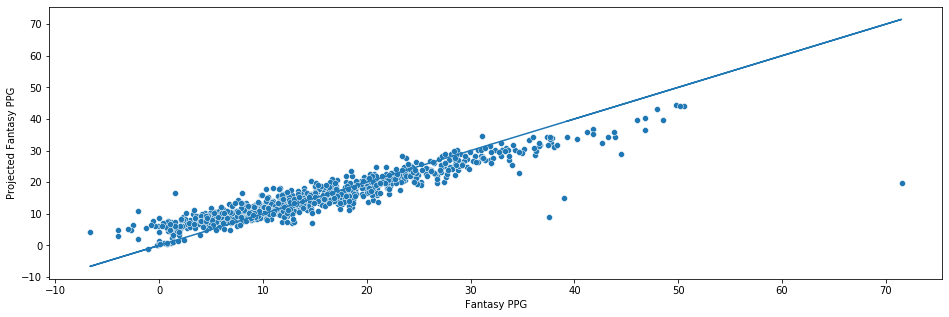

In [58]:
plt.figure(figsize=(16,5))
sns.scatterplot(df_yty_pg['Fantasy PPG'],df_yty_pg['Projected Fantasy PPG'],data=df_yty_pg)
plt.plot(df_yty_pg['Fantasy PPG'],df_yty_pg['Fantasy PPG'])

# Draft Strategy

## Draft Position

In [59]:
num_teams = 18
num_rounds = 16
draft_positions = {team:[] for team in range(1,num_teams+1)}
pick = 1
for rd in range(1,num_rounds+1):
    if rd%2==1:
        for team in range(1,num_teams+1):
            draft_positions[team].append(pick)
            pick+=1
    else:
        for team in reversed(range(1,num_teams+1)):
            draft_positions[team].append(pick)
            pick+=1
draft_positions[1]

[1, 36, 37, 72, 73, 108, 109, 144, 145, 180, 181, 216, 217, 252, 253, 288]

### Average Projected Fantasy PPG for Draft Position

In [60]:
df_draft_position_mean = pd.DataFrame([pd.Series(keeper_yty_pg[keeper_yty_pg['My Rank'].isin(draft_positions[i])][['Round','Rank','My Rank','Player Name','Pos','Fantasy PPG','Projected Fantasy PPG']].mean(),name=f"Team {i}") for i in range(1,num_teams+1)])
df_draft_position_mean

NameError: name 'keeper_yty_pg' is not defined

In [ ]:
df_draft_position_mean.sort_values(by='Projected Fantasy PPG',ascending=False)

In [ ]:
df_draft_position_mean.sort_values(by='Fantasy PPG',ascending=False)

## Keeper List

In [61]:
keeper_list_text = "1 Connor McDavid 1 2 Leon Draisaitl 1 3 Nathan MacKinnon 1 4 Artemi Panarin 1 5 Auston Matthews 1 6 Patrick Kane 1 7 Andrei Vasilevskiy 1 8 Mika Zibanejad 1 9 Sidney Crosby 1 10 Alex Ovechkin 1 11 Brad Marchand 1 12 Jack Eichel 1 13 Mitch Marner 1 14 Steven Stamkos 1 15 Connor Hellebuyck 1 16 John Carlson 1 17 Jake Guentzel 1 18 John Tavares 1 19 Jonathan Huberdeau 2 20 Sebastian Aho 2 21 Andrei Svechnikov 2 22 J.T. Miller 2 23 Brayden Point 2 24 Frederik Andersen 2 25 Aleksander Barkov 2 26 Igor Shesterkin 2 27 Kyle Connor 2 28 Ryan O'Reilly 2 29 Elias Pettersson 2 30 Sean Couturier 2 31 Roman Josi 2 32 Evgeni Malkin 2 33 Blake Wheeler 2 34 Matthew Tkachuk 2 35 Mark Stone 2 36 Max Pacioretty 2 37 Johnny Gaudreau 3 38 Teuvo Teravainen 3 39 Claude Giroux 3 40 Taylor Hall 3 41 Anze Kopitar 3 42 Dougie Hamilton 3 43 Patrice Bergeron 3 44 Elias Lindholm 3 45 Anton Khudobin 3 46 Patrik Laine 3 47 Dylan Larkin 3 48 Mikko Rantanen 3 49 Victor Hedman 3 50 Brent Burns 3 51 Travis Konecny 3 52 Jordan Binnington 3 53 Mark Scheifele 3 54 Gabriel Landeskog 3 55 Kevin Fiala 4 56 Nikolaj Ehlers 4 57 Morgan Rielly 4 58 Sean Monahan 4 59 Cale Makar 4 60 Brady Tkachuk 4 61 Sergei Bobrovsky 4 62 Carey Price 4 63 David Pastrnak 4 64 Ryan Nugent-Hopkins 4 65 Tomas Tatar 4 66 Robin Lehner 4 67 Mike Hoffman 4 68 Shea Theodore 4 69 John Gibson 4 70 Darcy Kuemper 4 71 Jacob Markstrom 4 72 Mathew Barzal 4 73 Kris Letang 5 74 Brock Nelson 5 75 Torey Krug 5 76 Quinn Hughes 5 77 Evander Kane 5 78 Timo Meier 5 79 Brayden Schenn 5 80 Oliver Bjorkstrand 5 81 Bo Horvat 5 82 Jakub Voracek 5 83 Brendan Gallagher 5 84 Mikko Koskinen 5 85 William Nylander 5 86 Alexis Lafreniere 5 87 Rasmus Dahlin 5 88 Tyson Barrie 5 89 Anthony DeAngelo 5 90 Sam Reinhart 5 91 Miro Heiskanen 6 92 Alex DeBrincat 6 93 Phillip Danault 6 94 Alex Pietrangelo 6 95 Jonathan Marchessault 6 96 William Karlsson 6 97 Bryan Rust 6 98 Aaron Ekblad 6 99 Erik Karlsson 6 100 Pierre-Luc Dubois 6 101 Nicklas Backstrom 6 102 Kirill Kaprizov 6 103 Clayton Keller 6 104 Tuukka Rask 6 105 Ryan Pulock 6 106 Evgeny Kuznetsov 6 107 Tristan Jarry 6 108 Tomas Hertl 6 109 Philipp Grubauer 7 110 Reilly Smith 7 111 Jakub Vrana 7 112 Nikita Gusev 7 113 Zach Werenski 7 114 Linus Ullmark 7 115 Darnell Nurse 7 116 Tom Wilson 7 117 Brock Boeser 7 118 Mikhail Sergachev 7 119 Ilya Samsonov 7 120 Mark Giordano 7 121 David Perron 7 122 Ryan Johansen 7 123 Jamie Benn 7 124 Matt Duchene 7 125 Filip Forsberg 7 126 Cam Talbot 7 127 Kasperi Kapanen 8 128 Thomas Chabot 8 129 Anders Lee 8 130 Dominik Kubalik 8 131 Anthony Mantha 8 132 Carter Hart 8 133 Seth Jones 8 134 Jason Zucker 8 135 Charlie McAvoy 8 136 Max Domi 8 137 Anthony Cirelli 8 138 Oliver Ekman-Larsson 8 139 Ryan Strome 8 140 Tyler Toffoli 8 141 Conor Garland 8 142 Rasmus Ristolainen 8 143 Neal Pionk 8 144 Jeff Petry 8 145 Ryan Suter 9 146 Logan Couture 9 147 Alexander Radulov 9 148 Nazem Kadri 9 149 Cam Atkinson 9 150 Chris Kreider 9 151 Jaccob Slavin 9 152 Ryan Ellis 9 153 Adam Fox 9 154 Ivan Provorov 9 155 Matt Dumba 9 156 Pavel Buchnevich 9 157 Mackenzie Blackwood 9 158 Jordan Eberle 9 159 Devon Toews 9 160 Kailer Yamamoto 9 161 Jonathan Toews 9 162 Colton Parayko 9 163 Christian Dvorak 10 164 Braden Holtby 10 165 Jacob Trouba 10 166 Zach Hyman 10 167 Drew Doughty 10 168 Nico Hischier 10 169 Mikael Backlund 10 170 Kevin Hayes 10 171 T.J. Oshie 10 172 John Klingberg 10 173 Eric Staal 10 174 Shea Weber 10 175 David Krejci 10 176 Tanner Pearson 10 177 Keith Yandle 10 178 Jaden Schwartz 10 179 Erik Gustafsson 10 180 Anthony Beauvillier 10 181 Rickard Rakell 11 182 Tyler Bertuzzi 11 183 Vincent Trocheck 11 184 Collin Delia 11 185 Filip Hronek 11 186 Thomas Greiss 11 187 Viktor Arvidsson 11 188 Josh Bailey 11 189 James van Riemsdyk 11 190 Ilya Mikheyev 11 191 Alex Killorn 11 192 Dylan Strome 11 193 Elvis Merzlikins 11 194 Evgenii Dadonov 11 195 Jakob Chychrun 11 196 Phil Kessel 11 197 Kyle Palmieri 11 198 Jared Spurgeon 11 199 Mattias Ekholm 12 200 Joe Pavelski 12 201 Blake Coleman 12 202 Kevin Labanc 12 203 Adam Henrique 12 204 Kaapo Kakko 12 205 Michael Matheson 12 206 Alex Iafallo 12 207 Josh Morrissey 12 208 Mikael Granlund 12 209 Jakob Silfverberg 12 210 Robert Thomas 12 211 Juuse Saros 12 212 Damon Severson 12 213 Andre Burakovsky 12 214 Devan Dubnyk 12 215 Jake Virtanen 12 216 Nick Suzuki 12 217 Jean-Gabriel Pageau 13 218 Ondrej Palat 13 219 Victor Olofsson 13 220 Matt Murray 13 221 Tyler Myers 13 222 Alexander Edler 13 223 Jeff Skinner 13 224 Jonathan Drouin 13 225 Jake DeBrusk 13 226 Alex Goligoski 13 227 Andreas Johnsson 13 228 Jared McCann 13 229 Paul Stastny 13 230 Chris Tierney 13 231 Petr Mrazek 13 232 Samuel Girard 13 233 Pekka Rinne 13 234 Roope Hintz 13 235 Semyon Varlamov 14 236 Ryan Getzlaf 14 237 Andreas Athanasiou 14 238 Jake Muzzin 14 239 Noah Hanifin 14 240 Oskar Lindblom 14 241 Nate Schmidt 14 242 Brandon Saad 14 243 Vince Dunn 14 244 Lawson Crouse 14 245 Frank Vatrano 14 246 Denis Gurianov 14 247 Andrew Mangiapane 14 248 Zach Parise 14 249 Travis Sanheim 14 250 Cal Petersen 14 251 P.K. Subban 14 252 Dustin Brown 14 253 Connor Brown 15 254 Marco Rossi 15 255 Lars Eller 15 256 Alex Galchenyuk 15 257 Yanni Gourde 15 258 Patric Hornqvist 15 259 Scott Laughton 15 260 Duncan Keith 15 261 Brandon Montour 15 262 Ryan Graves 15 263 Nick Schmaltz 15 264 Erik Cernak 15 265 Cam Fowler 15 266 Ondrej Kase 15 267 Esa Lindell 15 268 Ilya Sorokin 15 269 Tyler Johnson 15 270 Vincent Hinostroza 15 271 Craig Smith 16 272 Brady Skjei 16 273 Danton Heinen 16 274 Brett Connolly 16 275 Justin Faulk 16 276 Calle Jarnkrok 16 277 Vladislav Namestnikov 16 278 Dylan Cozens 16 279 Colin White 16 280 Charlie Coyle 16 281 Jordan Staal 16 282 Luke Kunin 16 283 Nino Niederreiter 16 284 Hampus Lindholm 16 285 Barclay Goodrow 16 286 Valeri Nichushkin 16 287 Jesper Bratt 16 288 Alex Tuch 16 289 Nikita Zadorov 17 290 Sam Steel 17 291 Sean Walker 17 292 Jonas Brodin 17 293 Anthony Duclair 17 294 Nick Foligno 17 295 Derek Stepan 17 296 Marcus Pettersson 17 297 Tyler Ennis 17 298 Adrian Kempe 17 299 Jack Hughes 17 300 Matt Grzelcyk 17"

In [62]:
keeper_list = keeper_list_text.split(' ')
ranks = []
names = []
rounds = []
counter = 0

for i in range(len(keeper_list)):
    if re.search('[\d]',keeper_list[i]):
        if counter%2 == 0:
            ranks.append(keeper_list[i])
            name = []
        else:
            rounds.append(keeper_list[i])
            names.append(' '.join(name))
        counter += 1
    else:
        name.append(keeper_list[i])

In [63]:
df_keeper = pd.DataFrame([pd.to_numeric(pd.Series(ranks,name='Rank')),
                          pd.Series(names,name='Player Name'),
                          pd.to_numeric(pd.Series(rounds,name='Round'))]).T
df_keeper

,Rank,Player Name,Round
0,1,Connor McDavid,1
1,2,Leon Draisaitl,1
2,3,Nathan MacKinnon,1
3,4,Artemi Panarin,1
4,5,Auston Matthews,1
...,...,...,...
295,296,Marcus Pettersson,17
296,297,Tyler Ennis,17
297,298,Adrian Kempe,17
298,299,Jack Hughes,17


In [64]:
df_keeper.to_csv('keeper_list.csv')

In [65]:
keeper_yty = df_keeper.merge(df_yty, on='Player Name', how='left')
keeper_yty[['Round','Rank','Player Name','Fantasy Points','Projected Fantasy Points']][:50]

,Round,Rank,Player Name,Fantasy Points,Projected Fantasy Points
0,1,1,Connor McDavid,3211.0,2558.678814
1,1,2,Leon Draisaitl,3591.0,2610.476471
2,1,3,Nathan MacKinnon,3311.0,2728.255653
3,1,4,Artemi Panarin,3231.5,2398.087457
4,1,5,Auston Matthews,3023.0,2539.802781
5,1,6,Patrick Kane,2925.5,2460.021492
6,1,7,Andrei Vasilevskiy,NaN,NaN
7,1,8,Mika Zibanejad,2766.0,2016.141700
8,1,9,Sidney Crosby,1543.5,1281.670069
9,1,10,Alex Ovechkin,2670.5,2429.917524


In [66]:
keeper_yty_pg = df_keeper.merge(df_yty_pg, on='Player Name', how='left')
keeper_yty_pg['My Rank'] = keeper_yty_pg['Projected Fantasy PPG'].rank(ascending=False)
# keeper_yty_pg[keeper_yty_pg['My Rank'].notnull()]['My Round'] = keeper_yty_pg[keeper_yty_pg['My Rank'].notnull()].apply(lambda x: math.floor(x/18)+1)
keeper_yty_pg[['Round','Rank','Player Name','Pos','Fantasy PPG','Projected Fantasy PPG']][:50]

,Round,Rank,Player Name,Pos,Fantasy PPG,Projected Fantasy PPG
0,1,1,Connor McDavid,C,50.171875,44.085641
1,1,2,Leon Draisaitl,C,50.577465,44.074706
2,1,3,Nathan MacKinnon,C,47.985507,43.243588
3,1,4,Artemi Panarin,LW,46.833333,36.580517
4,1,5,Auston Matthews,C,43.185714,34.302062
5,1,6,Patrick Kane,RW,41.792857,36.757668
6,1,7,Andrei Vasilevskiy,G,42.642857,32.381113
7,1,8,Mika Zibanejad,C,48.526316,39.645158
8,1,9,Sidney Crosby,C,37.646341,33.711071
9,1,10,Alex Ovechkin,LW,39.272059,34.360429


In [87]:
keeper_yty_pg[(keeper_yty_pg['Round']>=8)&(keeper_yty_pg['Round']<=10)][['Round','Rank','My Rank','Rank Diff','Player Name','Pos','Fantasy PPG','Projected Fantasy PPG']]

KeyError: "['Rank Diff'] not in index"

## No data on Keeper List

In [86]:
keeper_yty_pg[keeper_yty_pg['Projected Fantasy PPG'].isnull()]

,Rank,Player Name,Round,Pos,Games,Fantasy Points,Fantasy PPG,Projected Fantasy PPG,My Rank
85,86,Alexis Lafreniere,5,NaN,NaN,NaN,NaN,NaN,NaN
101,102,Kirill Kaprizov,6,NaN,NaN,NaN,NaN,NaN,NaN
156,157,Mackenzie Blackwood,9,NaN,NaN,NaN,NaN,NaN,NaN
183,184,Collin Delia,11,NaN,NaN,NaN,NaN,NaN,NaN
204,205,Michael Matheson,12,NaN,NaN,NaN,NaN,NaN,NaN
253,254,Marco Rossi,15,NaN,NaN,NaN,NaN,NaN,NaN
267,268,Ilya Sorokin,15,NaN,NaN,NaN,NaN,NaN,NaN
269,270,Vincent Hinostroza,15,NaN,NaN,NaN,NaN,NaN,NaN
277,278,Dylan Cozens,16,NaN,NaN,NaN,NaN,NaN,NaN


## My Keepers

In [69]:
roster = ['Dougie Hamilton',
         'Teuvo Teravainen',
         'Elias Lindholm',
         'Jonathan Toews',
         'Cam Atkinson',
         'Nikolaj Ehlers',
         'Tyler Seguin',
         'Alex Tuch',
         'Tyler Johnson',
         'Esa Lindell',
         'Ryan Dzingel',
         'Vince Dunn',
         'Zack Kassian',
         'T.J. Brodie',
         'Andrei Vasilevskiy',
         'Jacob Markstrom']

In [70]:
print(draft_positions[1])
print(draft_positions[4])
print(draft_positions[18])

[1, 36, 37, 72, 73, 108, 109, 144, 145, 180, 181, 216, 217, 252, 253, 288]
[4, 33, 40, 69, 76, 105, 112, 141, 148, 177, 184, 213, 220, 249, 256, 285]
[18, 19, 54, 55, 90, 91, 126, 127, 162, 163, 198, 199, 234, 235, 270, 271]


In [71]:
keeper_yty_pg['My Rank'] = keeper_yty_pg['Projected Fantasy PPG'].rank(ascending=False)
keeper_yty_pg['Rank Diff'] = keeper_yty_pg['Rank']-keeper_yty_pg['My Rank']
# keeper_yty['My Round'] = keeper_yty_pg['My Rank'].apply(lambda x: math.floor(x/18)+1)
keeper_yty_pg[keeper_yty_pg['Player Name'].isin(roster)][['Player Name','Round','Rank','My Rank','Rank Diff','Fantasy PPG','Projected Fantasy PPG']]

,Player Name,Round,Rank,My Rank,Rank Diff,Fantasy PPG,Projected Fantasy PPG
6,Andrei Vasilevskiy,1,7,24.0,-17,42.642857,32.381113
37,Teuvo Teravainen,3,38,45.0,-7,32.779412,29.676189
41,Dougie Hamilton,3,42,43.0,-1,36.319149,29.928486
43,Elias Lindholm,3,44,90.0,-46,28.492857,25.697442
55,Nikolaj Ehlers,4,56,100.0,-44,29.626761,24.894827
70,Jacob Markstrom,4,71,55.0,16,33.678571,28.388046
148,Cam Atkinson,9,149,104.0,45,23.568182,24.646083
160,Jonathan Toews,9,161,93.0,68,29.171429,25.362074
242,Vince Dunn,14,243,251.0,-8,15.225352,17.020416
266,Esa Lindell,15,267,281.0,-14,15.434783,14.496247


## Forecasted Roster

In [72]:
keeper_yty_pg[keeper_yty_pg['Rank'].isin(draft_positions[2])][['Player Name','Pos','Round','Rank','My Rank','Rank Diff','Fantasy PPG','Projected Fantasy PPG']]

,Player Name,Pos,Round,Rank,My Rank,Rank Diff,Fantasy PPG,Projected Fantasy PPG
1,Leon Draisaitl,C,1,2,3.0,-1,50.577465,44.074706
34,Mark Stone,RW,2,35,48.0,-13,34.630769,29.450015
37,Teuvo Teravainen,C,3,38,45.0,-7,32.779412,29.676189
70,Jacob Markstrom,G,4,71,55.0,16,33.678571,28.388046
73,Brock Nelson,C,5,74,117.0,-43,28.786765,23.729372
106,Tristan Jarry,G,6,107,167.0,-60,26.750000,21.089333
109,Reilly Smith,RW,7,110,144.0,-34,28.500000,22.385375
142,Neal Pionk,D,8,143,84.0,59,26.415493,26.287099
145,Logan Couture,C,9,146,139.0,7,27.711538,22.542871
178,Erik Gustafsson,D,10,179,244.0,-65,16.371212,17.375164


In [73]:
keeper_yty_pg[keeper_yty_pg['My Rank'].isin(draft_positions[2])][['Player Name','Pos','Round','Rank','My Rank','Rank Diff','Fantasy PPG','Projected Fantasy PPG']]

,Player Name,Pos,Round,Rank,My Rank,Rank Diff,Fantasy PPG,Projected Fantasy PPG
0,Connor McDavid,C,1,1,2.0,-1,50.171875,44.085641
45,Patrik Laine,RW,3,46,38.0,8,34.308824,30.157895
52,Mark Scheifele,C,3,53,35.0,18,35.112676,30.596691
80,Bo Horvat,C,5,81,71.0,10,26.942029,27.345006
131,Carter Hart,G,8,132,74.0,58,27.892857,27.087648
140,Conor Garland,RW,8,141,179.0,-38,21.588235,20.468909
151,Ryan Ellis,D,9,152,110.0,42,29.877551,24.174079
179,Anthony Beauvillier,LW,10,180,218.0,-38,20.661765,18.992415
182,Vincent Trocheck,C,11,183,146.0,37,22.879032,22.319782
194,Jakob Chychrun,D,11,195,215.0,-20,19.230159,19.176703


## My Rankings

### Round by Round Fantasy Value

In [74]:
keeper_yty = df_keeper.merge(df_yty, on='Player Name', how='left')
keeper_yty[['Round','Rank','Player Name','Fantasy Points','Projected Fantasy Points']].groupby(by='Round').mean()

,Fantasy Points,Projected Fantasy Points
Round,,
1,2692.093750,2114.482279
2,2371.781250,1847.705374
3,1990.406250,1624.590357
4,2029.250000,1643.570033
5,1776.812500,1470.394666
6,1664.933333,1372.953693
7,1657.678571,1337.407137
8,1559.794118,1273.856155
9,1441.264706,1182.125514


In [75]:
keeper_yty_pg = df_keeper.merge(df_yty_pg, on='Player Name', how='left')
keeper_yty_pg[['Round','Rank','Player Name','Fantasy PPG','Projected Fantasy PPG']].groupby(by='Round').describe()

Fantasy PPG                                                        \
            count       mean       std        min        25%        50%   
Round                                                                     
1            18.0  42.890137  4.799179  33.373016  39.514942  42.224937   
2            18.0  33.934066  6.414903  12.892857  32.478567  34.785973   
3            18.0  31.061343  3.930380  24.000000  28.535027  31.441919   
4            18.0  30.483760  5.994740  22.946809  28.026786  29.793849   
5            17.0  27.297448  2.800467  20.250000  25.907143  28.573770   
6            17.0  26.640010  4.666184  20.595588  23.678571  25.657143   
7            18.0  24.176218  3.897085  17.964286  21.430195  24.129141   
8            18.0  23.986327  3.634059  18.891304  21.342954  23.490476   
9            17.0  24.631445  4.847790  16.161765  22.733333  23.615942   
10           18.0  22.998255  3.202694  16.371212  20.394919  23.367340   
11           17.0  21.796733  2.814875  16.807692  19.678571  22.007576   
12           17.0  20.016461  4.064223  11.871212  17.876923  19.704225   
13           18.0  20.909692  3.616456  15.042373  18.477284  20.652817   
14           18.0  18.584748  5.029230   6.857143  14.915034  19.387455   
15           15.0  18.708478  3.680505  13.440299  15.717391  18.530769   
16           17.0  17.229115  2.405739  12.326087  16.116071  17.022059   
17           12.0  16.052222  3.803962  11.638462  13.449944  15.423319   

                            Projected Fantasy PPG                       \
             75%        max                 count       mean       std   
Round                                                                    
1      46.821429  50.577465                  18.0  36.474915  4.127598   
2      36.643371  45.990909                  18.0  29.135306  6.111234   
3      34.246499  36.549180                  18.0  28.815455  2.223732   
4      31.114616  49.821429                  18.0  28.027427  5.043485   
5      28.857143  31.109375                  17.0  25.856583  3.051725   
6      28.507576  38.045455                  17.0  24.389204  4.347953   
7      27.799073  31.014085                  18.0  22.625203  4.076626   
8      25.845588  31.825581                  18.0  22.172000  3.780651   
9      28.558824  34.666667                  17.0  22.116341  2.994399   
10     24.825107  28.436620                  18.0  21.511068  2.074752   
11     23.357143  27.044118                  17.0  21.575468  3.055617   
12     22.114286  27.612069                  17.0  19.336615  2.896249   
13     24.014286  27.268519                  18.0  19.475680  2.964963   
14     21.808451  28.357143                  18.0  18.019098  5.139535   
15     21.324899  27.134615                  15.0  17.477131  3.026242   
16     18.888889  20.935714                  17.0  17.215737  1.678120   
17     18.559239  23.424242                  12.0  16.898456  3.286314   

                                                              
             min        25%        50%        75%        max  
Round                                                         
1      30.778315  33.806882  35.480155  38.923286  44.085641  
2       8.458620  28.327731  29.834967  31.668060  39.632949  
3      25.697442  26.877738  28.835644  30.224848  33.392287  
4      22.510280  24.979419  27.643000  29.335164  44.418786  
5      21.345293  23.911976  25.374174  27.345006  34.741658  
6      18.558813  21.089333  22.700358  27.751645  34.311832  
7      15.517441  19.745999  22.999820  24.627293  30.150735  
8      16.490665  19.703861  21.948804  23.786982  31.378925  
9      16.236486  20.156854  22.549319  24.174079  26.717739  
10     17.375164  20.471964  21.473181  22.590020  27.176273  
11     17.757903  19.390337  20.571275  23.515562  28.141355  
12     10.495878  18.271463  19.632787  21.173087  23.512955  
13     15.681868  17.283655  19.703135  20.121543  28.276901  
14      4.898761

### Fantasy Points Per Game

In [76]:
keeper_yty_pg = df_keeper.merge(df_yty_pg, on='Player Name', how='left')
keeper_yty_pg['My Rank'] = keeper_yty_pg['Projected Fantasy PPG'].rank(ascending=False)
keeper_yty_pg[['Round','Rank','My Rank','Player Name','Pos','Fantasy PPG','Projected Fantasy PPG']][:50]

,Round,Rank,My Rank,Player Name,Pos,Fantasy PPG,Projected Fantasy PPG
0,1,1,2.0,Connor McDavid,C,50.171875,44.085641
1,1,2,3.0,Leon Draisaitl,C,50.577465,44.074706
2,1,3,4.0,Nathan MacKinnon,C,47.985507,43.243588
3,1,4,9.0,Artemi Panarin,LW,46.833333,36.580517
4,1,5,16.0,Auston Matthews,C,43.185714,34.302062
5,1,6,8.0,Patrick Kane,RW,41.792857,36.757668
6,1,7,24.0,Andrei Vasilevskiy,G,42.642857,32.381113
7,1,8,6.0,Mika Zibanejad,C,48.526316,39.645158
8,1,9,20.0,Sidney Crosby,C,37.646341,33.711071
9,1,10,14.0,Alex Ovechkin,LW,39.272059,34.360429


In [77]:
keeper_yty_pg[['Round','Rank','My Rank','Rank Diff','Player Name','Pos','Fantasy PPG','Projected Fantasy PPG']].sort_values(by='My Rank',ascending=True)[:50]

KeyError: "['Rank Diff'] not in index"

### Most Undervalued Player

In [78]:
keeper_yty_pg[['Round','Rank','My Rank','Rank Diff','Player Name','Pos','Fantasy PPG','Projected Fantasy PPG']].sort_values(by='Rank Diff',ascending=False)[:50]

KeyError: "['Rank Diff'] not in index"

### Most Overvalued Players

In [79]:
keeper_yty_pg[['Round','Rank','My Rank','Rank Diff','Player Name','Pos','Fantasy PPG','Projected Fantasy PPG']].sort_values(by='Rank Diff',ascending=True)[:50]

KeyError: "['Rank Diff'] not in index"

### Advanced Stats

In [80]:
keeper_adv = df_keeper.merge(df_2019_adv, on='Player Name', how='left')
keeper_adv['My Rank'] = keeper_adv['Projected Fantasy Points'].rank(ascending=False)
keeper_adv[['Round','Rank','My Rank','Player Name','Fantasy Points','Projected Fantasy Points']].dropna()[:50]

,Round,Rank,My Rank,Player Name,Fantasy Points,Projected Fantasy Points
0,1,1,4.0,Connor McDavid,2996.0,3134.689840
1,1,2,2.0,Leon Draisaitl,3371.0,3455.586475
2,1,3,3.0,Nathan MacKinnon,3156.0,3179.921643
3,1,4,6.0,Artemi Panarin,3111.5,2885.104814
4,1,5,5.0,Auston Matthews,2898.0,3001.031380
5,1,6,10.0,Patrick Kane,2810.5,2703.090327
7,1,8,11.0,Mika Zibanejad,2581.0,2629.375639
8,1,9,143.0,Sidney Crosby,1458.5,1450.243632
9,1,10,14.0,Alex Ovechkin,2580.5,2471.966887
10,1,11,7.0,Brad Marchand,2898.5,2792.423609


# Draft Management

In [81]:
actual_keepers = [
    'Patrick Kane','Patrice Bergeron','Alex Pietrangelo',
    'Kailer Yamamoto','Tyler Seguin','Tyler Johnson',
    'Nathan MacKinnon','Rickard Rakell','Anthony Mantha',
    'Artemi Panarin','Evgeni Malkin','Taylor Hall',
    'Victor Hedman','Aleksander Barkov','Vladimir Tarasenko',
    'David Pastrnak','Jack Eichel','Victor Olofsson','Thomas Chabot',
    'Connor McDavid','Sebastian Aho','Ryan Pulock',
    'Leon Draisaitl','Roman Josi','Miro Heiskanen',
    'Auston Matthews','Sidney Crosby','Quinn Hughes',
    'Elias Pettersson','Kyle Connor','Nikita Kucherov',
    'Brad Marchand','Cale Makar',
    'Alex Ovechkin','Matthew Tkachuk','Ilya Samsonov',
    'J.T. Miller','Johnny Gaudreau','Tyson Barrie',
    'Steven Stamkos','Sean Couturier','Carey Price'
]
actual_picks = [
    'Connor Hellebuyck','Mika Zibanejad','Max Pacioretty','Mitch Marner','Jake Guentzel','Andrei Vasilevskiy','Tuukka Rask','Jordan Binnington',
    'Evander Kane','John Carlson','Mikko Rantanen','Jonathan Huberdeau','Frederik Andersen',
]

In [82]:
keeper_yty_pg[keeper_yty_pg['Player Name'].isin(actual_keepers+actual_picks)][['Round','Rank','My Rank','Rank Diff','Player Name','Pos','Fantasy PPG','Projected Fantasy PPG']].sort_values(by='My Rank',ascending=True)[:50]

KeyError: "['Rank Diff'] not in index"

## Overall Rank

In [83]:
keeper_yty_pg[~keeper_yty_pg['Player Name'].isin(actual_keepers+actual_picks)][['Round','Rank','My Rank','Rank Diff','Player Name','Pos','Fantasy PPG','Projected Fantasy PPG']].sort_values(by='My Rank',ascending=True)[70:120]

KeyError: "['Rank Diff'] not in index"

## Skater Rank

In [84]:
keeper_yty_pg[~keeper_yty_pg['Player Name'].isin(actual_keepers+actual_picks)&(keeper_yty_pg['Pos'].isin(['D']))][['Round','Rank','My Rank','Rank Diff','Player Name','Pos','Fantasy PPG','Projected Fantasy PPG']].sort_values(by='My Rank',ascending=True)[:50]

KeyError: "['Rank Diff'] not in index"

## Goalie Ranks

In [85]:
keeper_yty_pg[~keeper_yty_pg['Player Name'].isin(actual_keepers+actual_picks)&(keeper_yty_pg['Pos']=='G')][['Round','Rank','My Rank','Rank Diff','Player Name','Pos','Fantasy PPG','Projected Fantasy PPG']].sort_values(by='My Rank',ascending=True)[:50]

KeyError: "['Rank Diff'] not in index"